# India House Rent Prediction

#### Nathan Lawira

## Part 1: Data Acquisition

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

from scipy.stats import probplot, boxcox, f
from scipy.special import inv_boxcox
import pylab

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Reading data from a comma-separataed values (.csv) file and storing it into a dataframe
file_path = 'House_Rent_Dataset.csv'
data = pd.read_csv(file_path)
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

### Dataset Glossary is as follows (taken from the dataset's source, __[Kaggle](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset?resource=download)__):

- **BHK**: Number of Bedrooms, Hall, Kitchen.
- **Rent**: Rent of the Houses/Apartments/Flats.
- **Size**: Size of the Houses/Apartments/Flats in Square Feet.
- **Floor**: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
- **Area Type**: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
- **Area Locality**: Locality of the Houses/Apartments/Flats.
- **City**: City where the Houses/Apartments/Flats are Located.
- **Furnishing Status**: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
- **Tenant Preferred**: Type of Tenant Preferred by the Owner or Agent.
- **Bathroom**: Number of Bathrooms.
- **Point of Contact**: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [4]:
# Identifying the size of the data
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 4746
Number of columns: 12


In [5]:
# Basic info about the data, understanding column names and column types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
# Converting Posted On to datetime data type
data['Posted On'] = pd.to_datetime(data['Posted On'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


In [7]:
# Checking for null and duplicated values
print(data.isna().sum())
print("\nDuplicated Data:", data.duplicated().sum())

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

Duplicated Data: 0


Based on the observations above, there are no null and duplicated values in this dataset.

In [8]:
# Descriptive statistics
data.describe()

,Posted On,BHK,Rent,Size,Bathroom
count,4746,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2022-06-07 18:01:40.126422272,2.083860,3.499345e+04,967.490729,1.965866
min,2022-04-13 00:00:00,1.000000,1.200000e+03,10.000000,1.000000
25%,2022-05-20 00:00:00,2.000000,1.000000e+04,550.000000,1.000000
50%,2022-06-10 00:00:00,2.000000,1.600000e+04,850.000000,2.000000
75%,2022-06-28 00:00:00,3.000000,3.300000e+04,1200.000000,2.000000
max,2022-07-11 00:00:00,6.000000,3.500000e+06,8000.000000,10.000000
std,NaN,0.832256,7.810641e+04,634.202328,0.884532


Rent's `Mean` is greater than two times of its `Median`. Therefore, this may indicate the presence of outliers.

## Part 2: Exploratory Analysis & Pre-Processing
#### Part 2.1: Numerical Variables

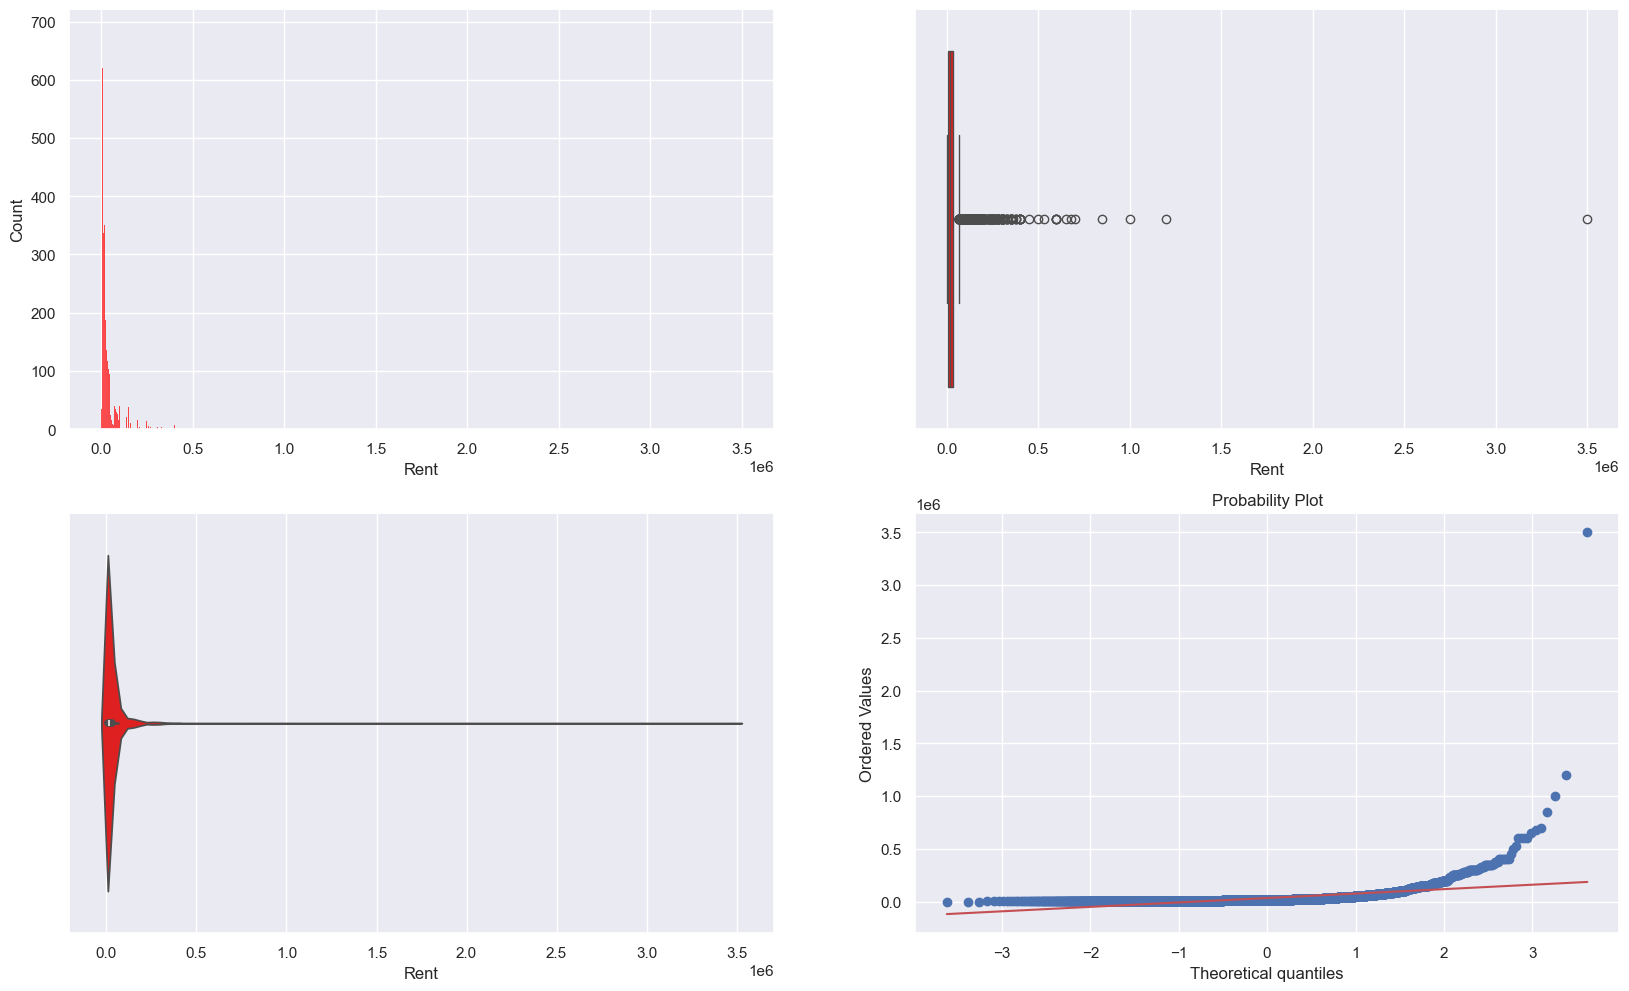

In [9]:
# Checking distribution of Rent
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sb.histplot(x = data['Rent'], color='red', ax= ax[0, 0])
ax2 = sb.boxplot(x = data['Rent'], ax= ax[0, 1], color= 'red')
ax3 = sb.violinplot(x = data['Rent'], ax= ax[1, 0], color= 'red')
ax4 = probplot(data['Rent'], plot=pylab)
pylab.show()

From the plots above, it can be seen that there is an extreme outlier with a value far greater than the rest. To resolve this outlier, I will remove it.

In [10]:
# Finding extreme outlier and removing that index
max_rent = data['Rent'].max()
max_rent_index = data[data['Rent'] == max_rent].index
data = data.drop(max_rent_index)

# Confirming that row has been removed
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 4745
Number of columns: 12


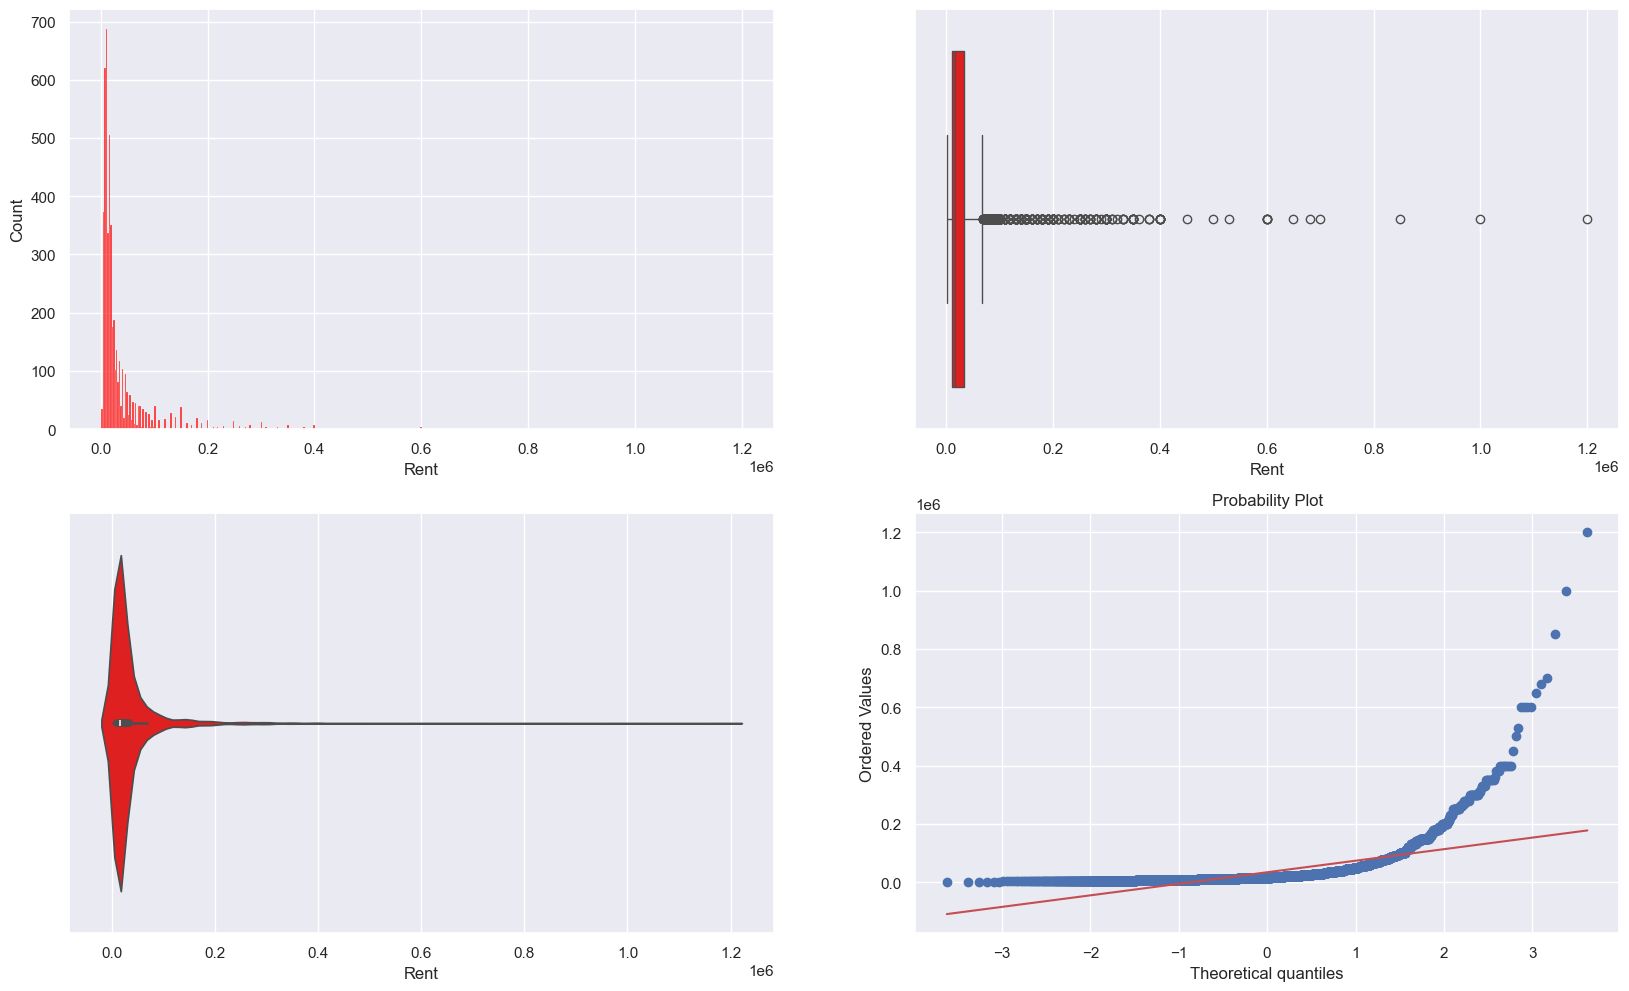

In [11]:
# Replotting distribution of Rent after removal of extreme outlier
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sb.histplot(x = data['Rent'], color='red', ax= ax[0, 0])
ax2 = sb.boxplot(x = data['Rent'], ax= ax[0, 1], color= 'red')
ax3 = sb.violinplot(x = data['Rent'], ax= ax[1, 0], color= 'red')
ax4 = probplot(data['Rent'], plot=pylab)
pylab.show()

The graphs confirm that `Rent` is positively skewed, as was indicated by having a `Mean` greater than the `Median`.

However, the points on the probability plot deviate from the line, indicating that the data is not close to a normal distribution. This may affect the accuracy of the linear regression and other machine learning models negatively. 

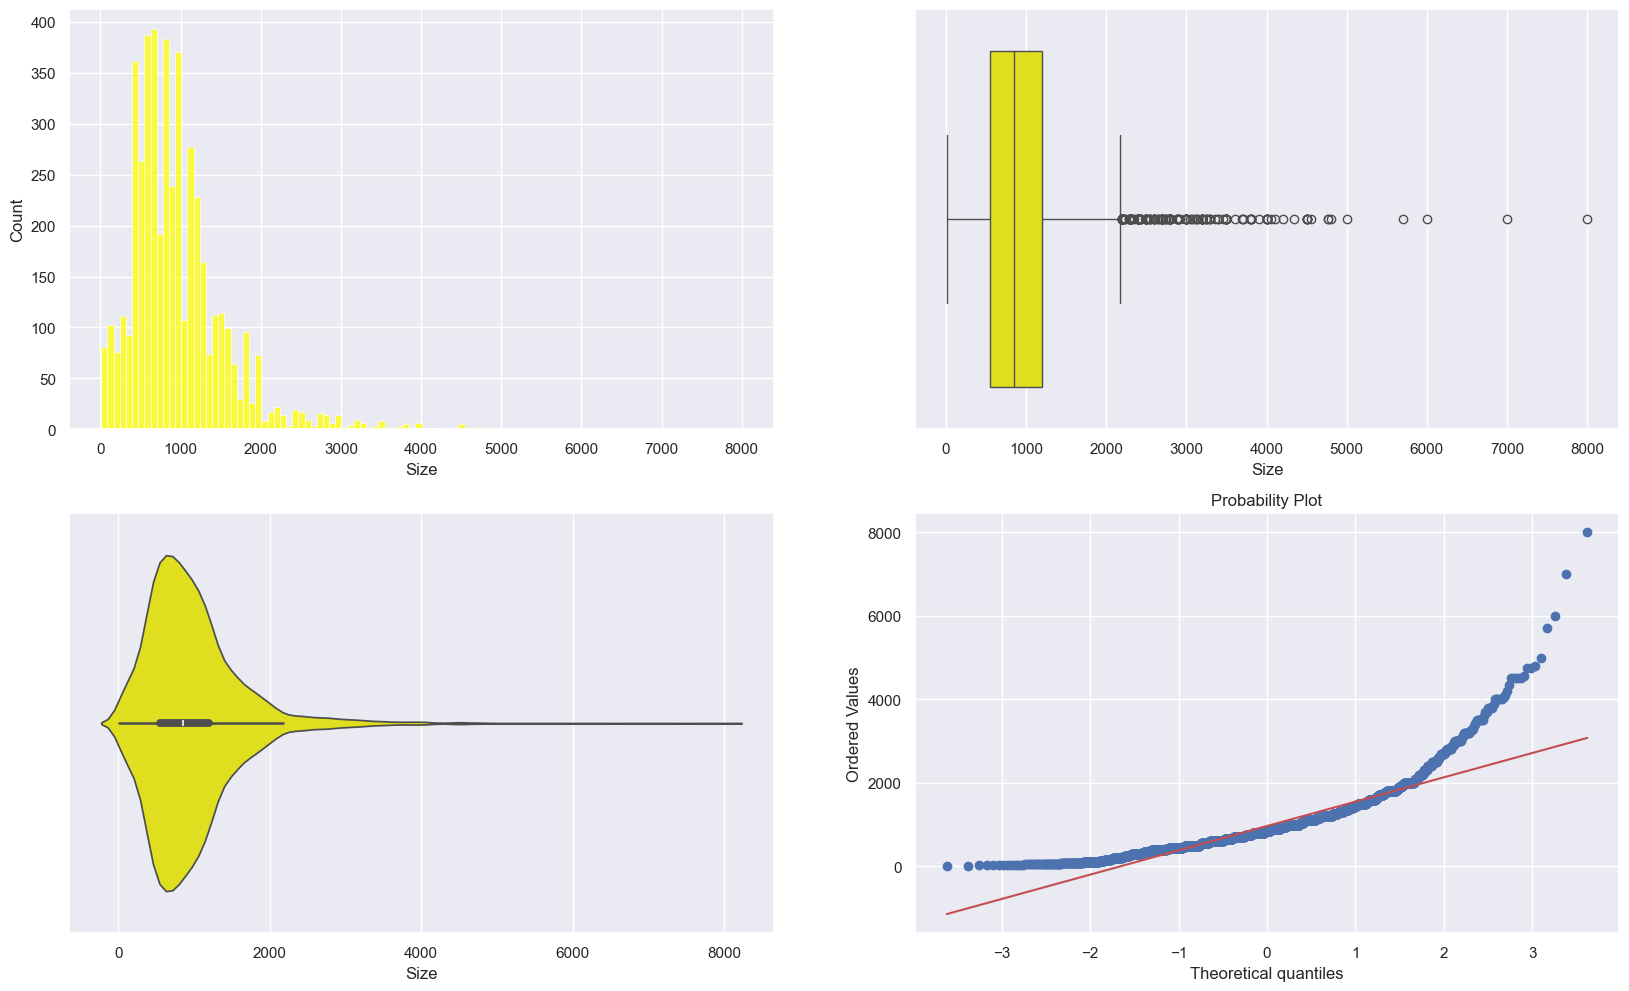

In [12]:
# Checking distribution of Size
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sb.histplot(x = data['Size'], color='yellow', ax= ax[0, 0])
ax2 = sb.boxplot(x = data['Size'], ax= ax[0, 1], color= 'yellow')
ax3 = sb.violinplot(x = data['Size'], ax= ax[1, 0], color= 'yellow')
ax4 = probplot(data['Size'], plot=pylab)
pylab.show()

Unlike `Rent`, `Size` does not have an extreme outlier. Therefore, the data points can be kept as is.

The graphs confirm that `Size` is positively skewed, as was indicated by having a `Mean` greater than the `Median`.

Like `Rent`, the points on the probability plot deviate from the line, indicating that the data is not close to a normal distribution. This may affect the accuracy of the linear regression and other machine learning models negatively.

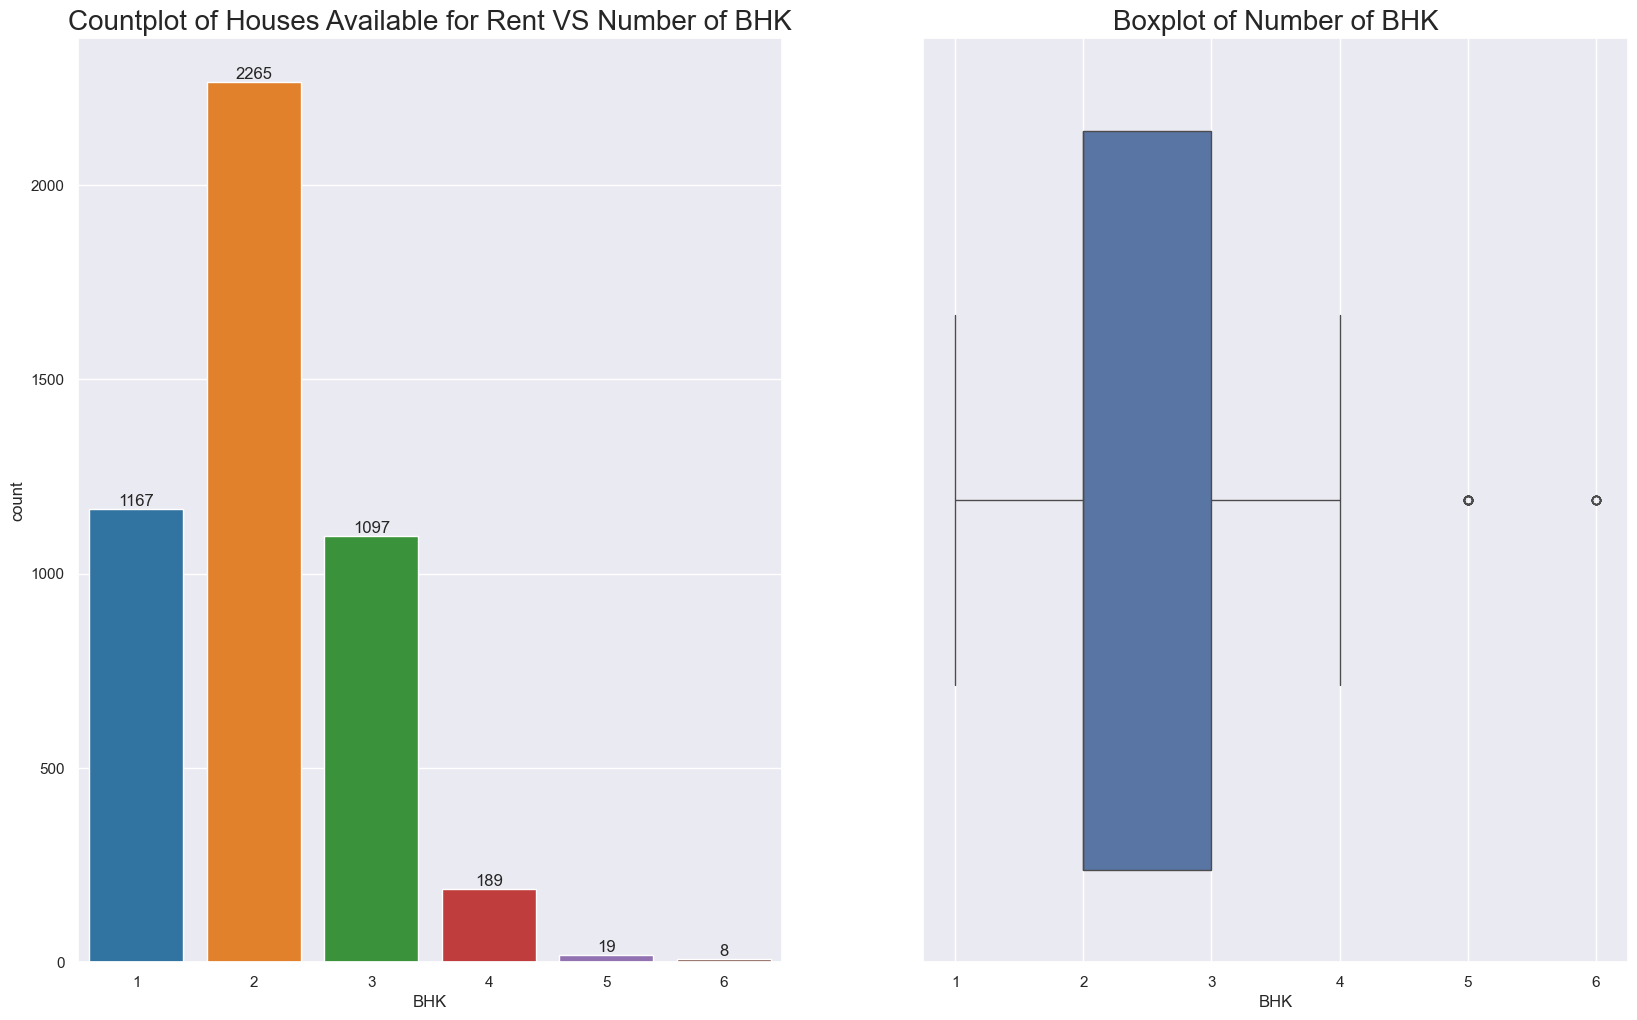

In [13]:
# Countplot of BHK
fig, ax = plt.subplots(1, 2, figsize=(20, 12))
ax1 = sb.countplot(x='BHK',data=data,palette='tab10',ax=ax[0], hue = 'BHK', legend = False)
for container in ax1.containers:
    ax1.bar_label(container)
ax2 = sb.boxplot(x = data['BHK'], ax= ax[1])
ax1.set_title('Countplot of Houses Available for Rent VS Number of BHK',fontsize=20)
ax2.set_title('Boxplot of Number of BHK',fontsize=20)
plt.show()

From the plot above, most houses put on rent have 2 BHK, while houses with 4 BHK and above are scarce. This **may** indicate the lesser demand for bigger houses and higher demand for smaller houses in India.

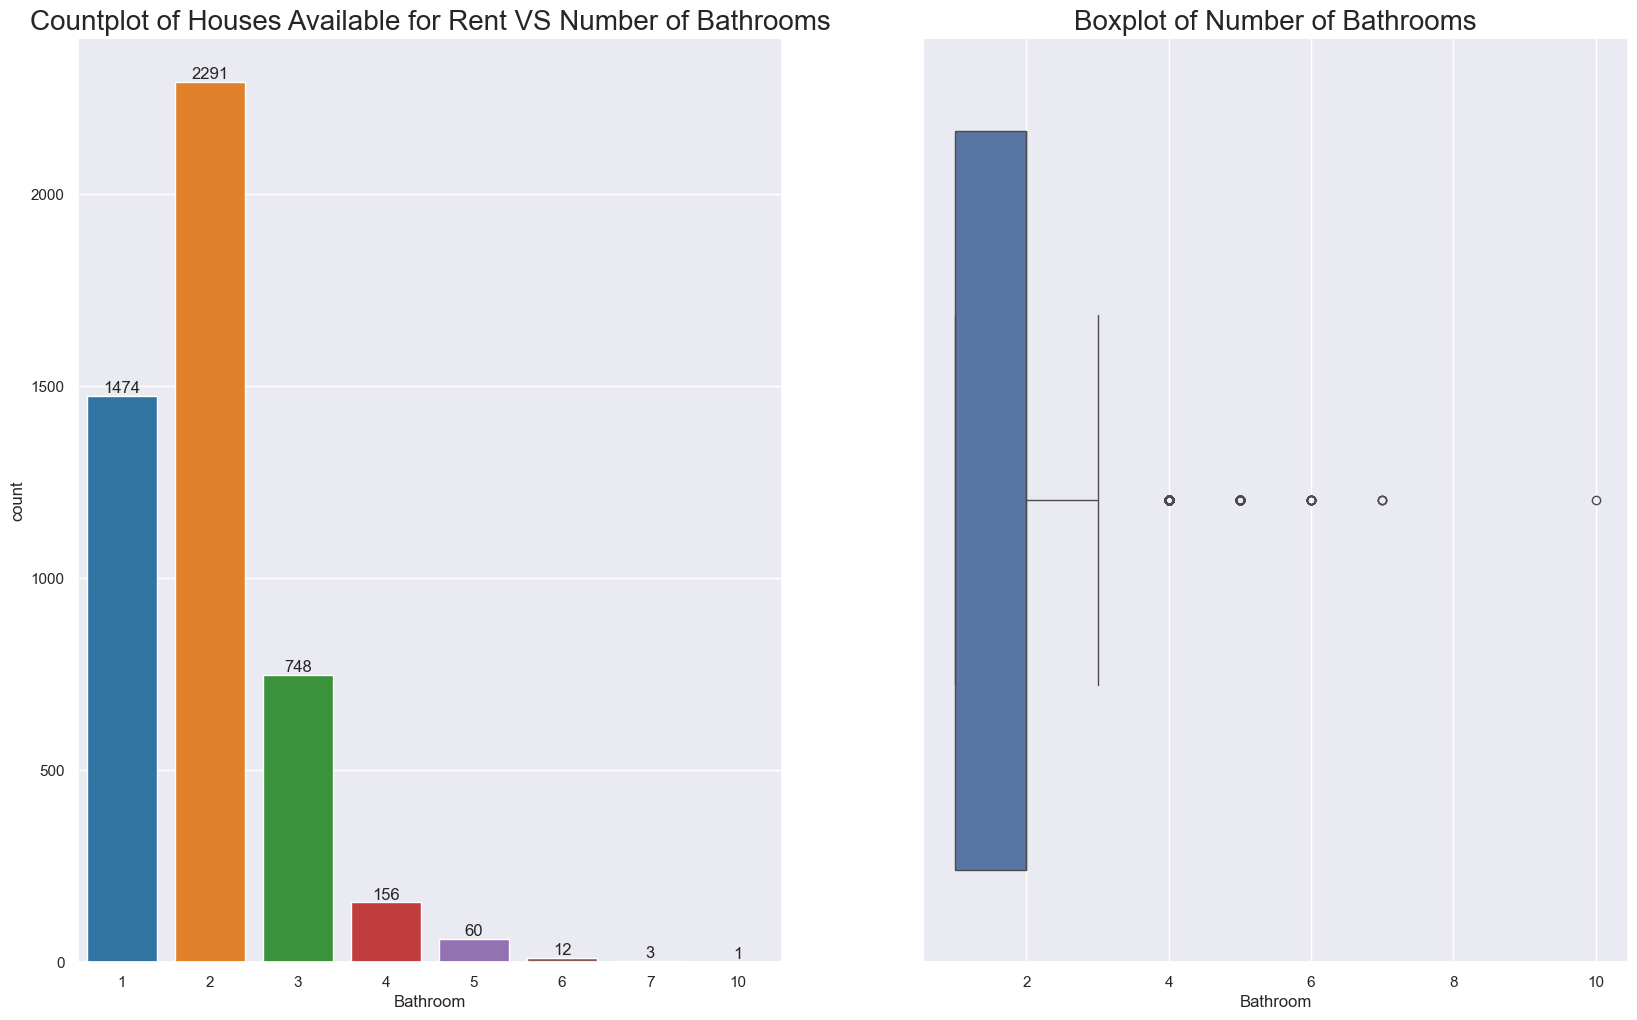

In [14]:
# Countplot of Bathroom
fig, ax = plt.subplots(1, 2, figsize=(20,12))
ax1 = sb.countplot(x='Bathroom',data=data,palette='tab10',ax=ax[0], hue = 'Bathroom', legend = False)
for container in ax1.containers:
    ax1.bar_label(container)
ax2 = sb.boxplot(x = data['Bathroom'], ax= ax[1])
ax1.set_title('Countplot of Houses Available for Rent VS Number of Bathrooms',fontsize=20)
ax2.set_title('Boxplot of Number of Bathrooms',fontsize=20)
plt.show()

From the plot above, most houses put on rent have 2 bathrooms, while houses with 6 bathrooms and above are scarce. This **may** indicate the lesser demand for bigger houses and higher demand for smaller houses in India.

#### Part 2.2: Categorical Variables

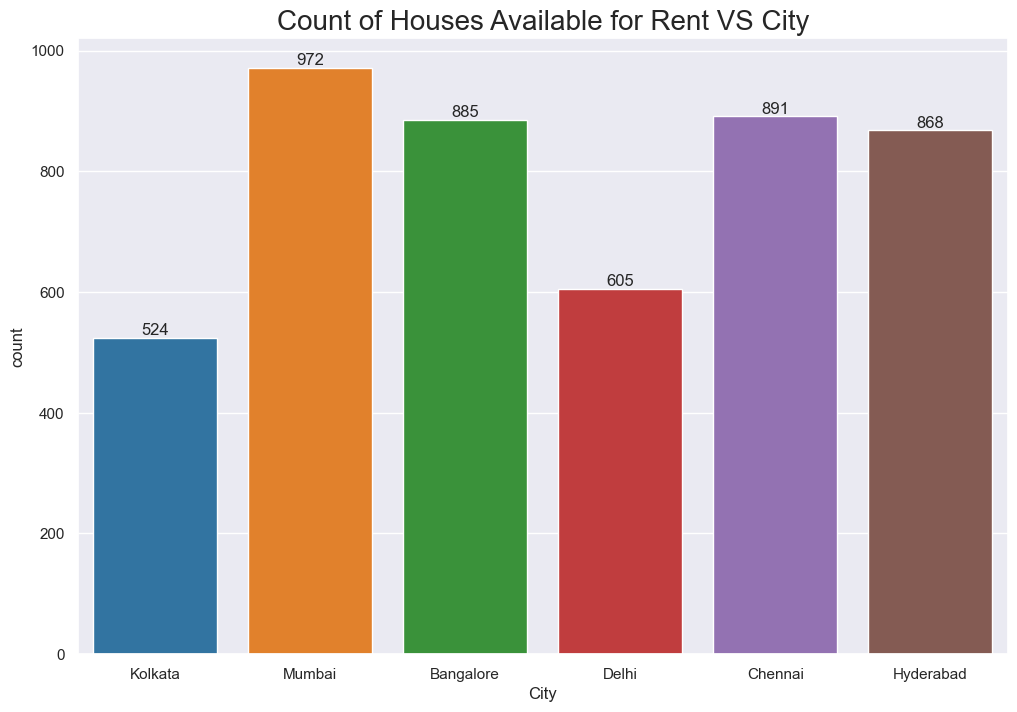

In [15]:
# Countplot of City
fig,axes = plt.subplots(figsize=(12,8))

ax = sb.countplot(x='City',data=data, palette='tab10', hue = 'City', legend = False)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of Houses Available for Rent VS City',fontsize=20)
plt.show()

Mumbai has the largest number of houses available for rent, followed by Chennai, Bangalore, and Hyderabad respectively. This trend correlates to these 4 cities being amongst the densest and most developed cities in India.

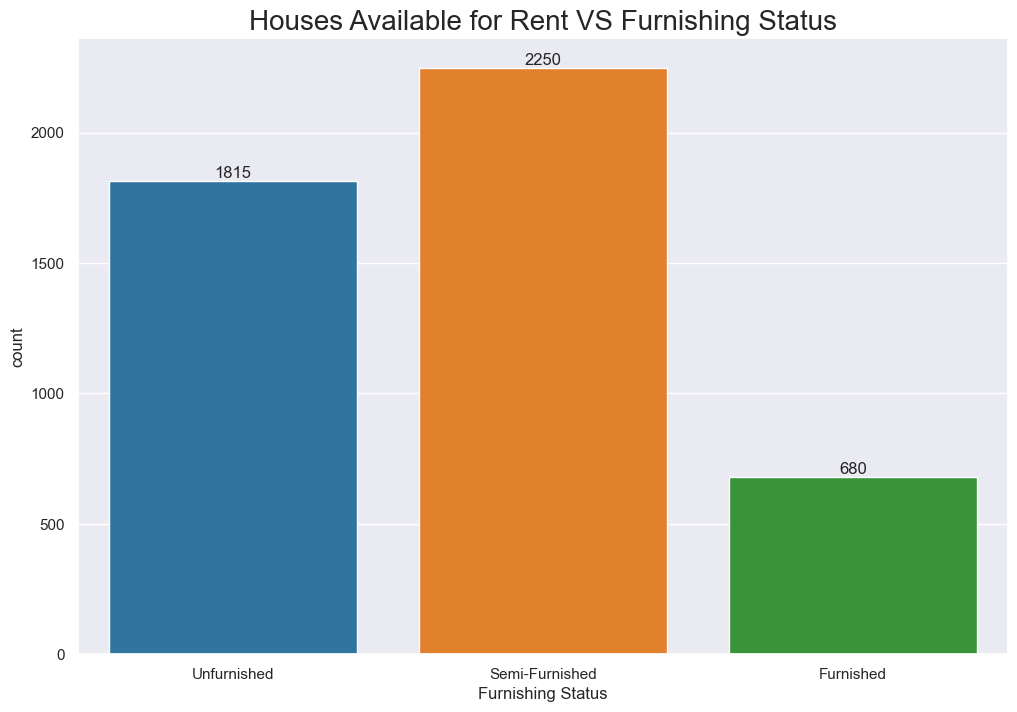

In [16]:
# Countplot of Furnishing Status
fig,axes = plt.subplots(figsize=(12,8))

ax = sb.countplot(x='Furnishing Status',data=data, palette='tab10', hue = 'Furnishing Status', legend = False)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Houses Available for Rent VS Furnishing Status',fontsize=20)
plt.show()

Most houses are semi-furnished followed by unfurnished and furnished respectively. This **may** indicate tenants' preference for a house that is more budget-friendly.

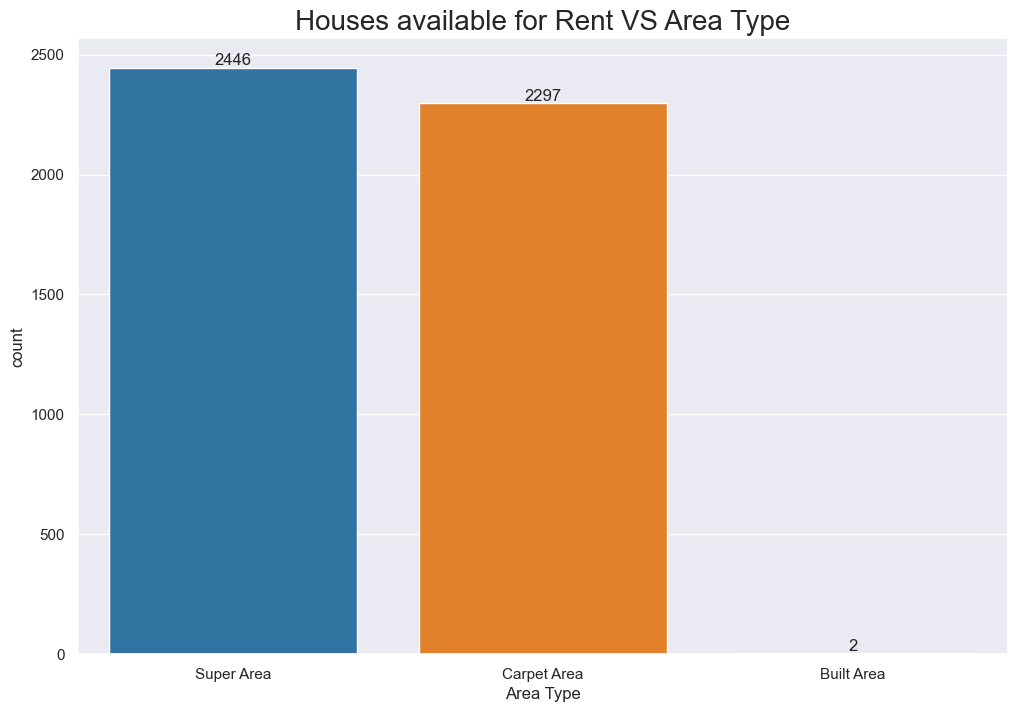

In [17]:
# Countplot of Area Type
fig,axes = plt.subplots(figsize=(12,8))

ax = sb.countplot(x='Area Type',data=data, palette='tab10', hue = 'Area Type', legend = False)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Houses available for Rent VS Area Type',fontsize=20)
plt.show()

In India, the area of houses on rent are mostly displayed as `Super Area` followed by `Carpet Area`.

Since the number of `Build Area` is much less than the other categories under `Area Type`, this data point will be removed as an extreme outlier.

In [18]:
# Dropping the rows with built area since it is an extreme outlier
data = data[~data['Area Type'].str.contains('Built Area')]

# Confirming that rows have been dropped
print('Number of rows:', data.shape[0])

Number of rows: 4743


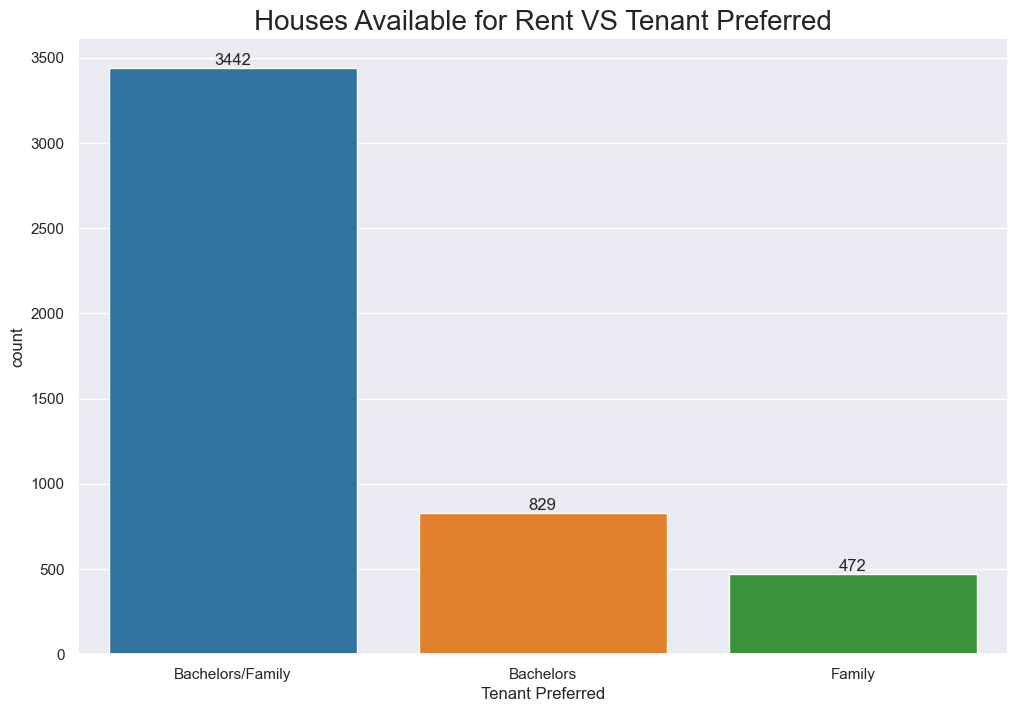

In [19]:
# Countplot of Area Type
fig,axes = plt.subplots(figsize=(12,8))

ax = sb.countplot(x='Tenant Preferred',data=data, palette='tab10', hue = 'Tenant Preferred', legend = False)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Houses Available for Rent VS Tenant Preferred',fontsize=20)
plt.show()

Most houses available for rent are okay to be inhabited by both bachelors and family.

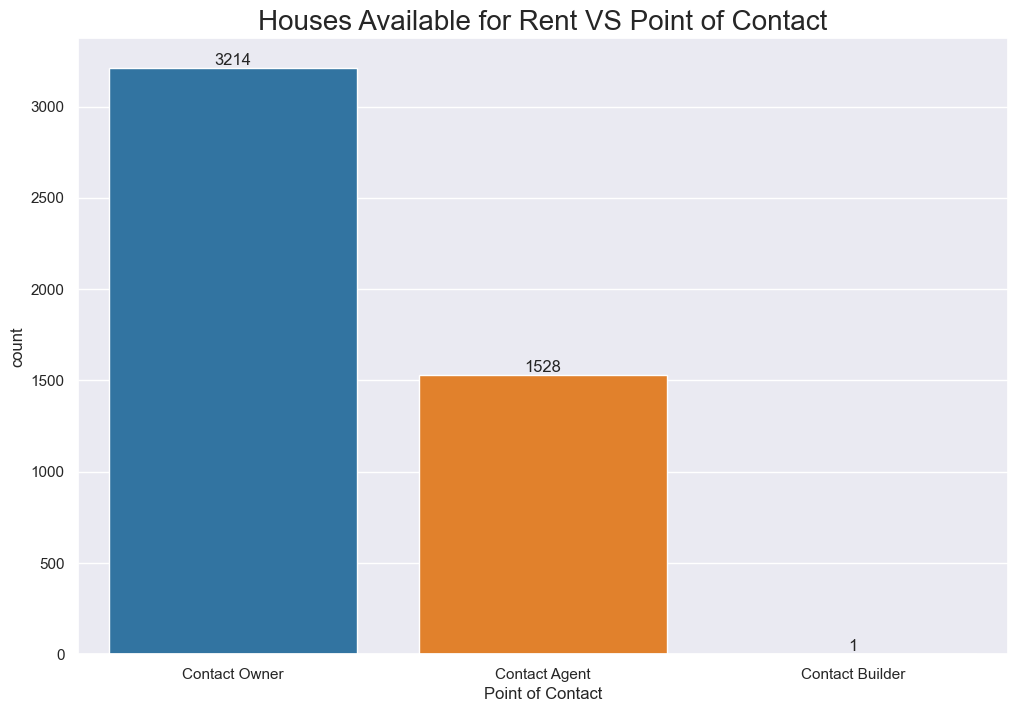

In [20]:
# Countplot of Point of Contact
fig,axes = plt.subplots(figsize=(12,8))

ax = sb.countplot(x='Point of Contact',data=data, palette='tab10', hue = 'Point of Contact', legend = False)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Houses Available for Rent VS Point of Contact',fontsize=20)
plt.show()

`Contact Owner` is the most common point of contact followed by `Contact Agent`. This **may** indicate landlords' preference for directly negotiating rather than through an agent.

Since the number of `Contact Builders` is much less than the other categories under `Point of Contact`, this data point will be removed as it is an extreme outlier.

In [21]:
# Dropping the row with contact builder since it is an extreme outlier
data = data[~data['Point of Contact'].str.contains("Contact Builder")]

# Confirming that rows have been dropped
print("Number of rows:", data.shape[0])

Number of rows: 4742


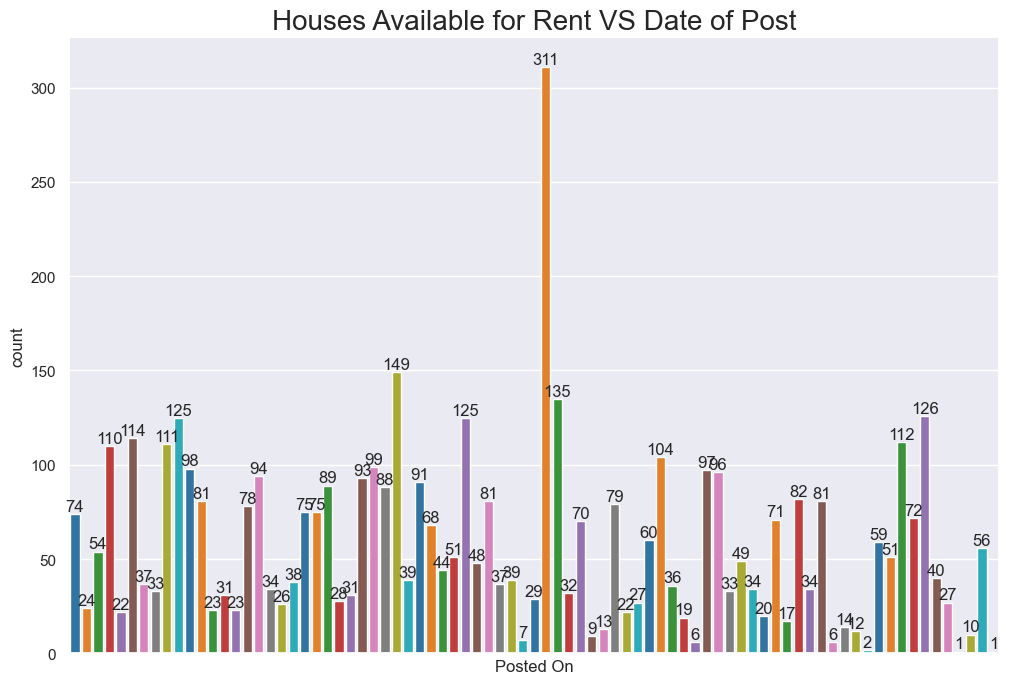

In [22]:
# Countplot of Posted On
fig,axes = plt.subplots(figsize=(12,8))

ax = sb.countplot(x='Posted On',data=data, palette='tab10', hue='Posted On', legend = False)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Houses Available for Rent VS Date of Post',fontsize=20)
plt.xticks([])
plt.show()

`Posted On` has many unique values, with some having few counts. So, this variable in this state will not be useful for modeling. We can convert this categorical variable into two numeric variables, `Day Posted`, `Day of the Week`, `Month Posted`, `Quarter Posted`. This allows us to retain information and convert this variable into one more suited to train machine learning algorithms instead of outright removing this variable. There will be `Year Posted` variable since all `Posted On` dates are in 2022.

In [23]:
# Splitting the Posted On column into three new columns
data['Day Posted'] = data['Posted On'].dt.day
data['Day of the Week Posted'] = data['Posted On'].dt.weekday
data['Month Posted'] = data['Posted On'].dt.month
data['Quarter Posted'] = data['Posted On'].dt.quarter

# Display the new columns
data[['Day Posted', 'Day of the Week Posted', 'Month Posted', 'Quarter Posted']]

,Day Posted,Day of the Week Posted,Month Posted,Quarter Posted
0,18,2,5,2
1,13,4,5,2
2,16,0,5,2
3,4,0,7,3
4,9,0,5,2
...,...,...,...,...
4741,18,2,5,2
4742,15,6,5,2
4743,10,6,7,3
4744,6,2,7,3


In [24]:
# Value Counts of Floor
data['Floor'].value_counts()

Floor
1 out of 2         377
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64

`Floor` has many unique values, with some having few counts. So, this variable in this state will not be useful for modeling. We can convert this categorical variable into two numeric variables, `Floor Level` and `Total Floors`. This allows us to retain information and convert this variable into one more suited to train machine learning algorithms instead of outright removing this variable.

In [25]:
# Finding rows without 'out of'
data[data['Floor'].str.find('out of') == -1].Floor

2553         3
2883    Ground
4490         1
4560         1
Name: Floor, dtype: object

As the code output above shows, 4 rows do not have 'out of' in the `Floor` column. Since this dataset was immediately extracted from https://www.magicbricks.com/, this observation may indicate that some listings' floors are listed incorrectly. Further research will be required to determine the root cause.

For the purposes of this project, these 4 rows will not be used for modeling.

In [26]:
# Removing the 4 rows
data = data[data['Floor'].str.find('out of') != -1]

# Splitting Floor column into two new columns
data = data.join(data['Floor'].str.split(' out of ', n = 1, expand=True).rename(columns={0:'Floor Level', 1:'Total Floors'}))
data['Floor Level'] = data.apply(lambda x: 0 if x['Floor Level'] =='Ground' \
                                 else ( -1 if x['Floor Level'] =='Upper Basement' \
                                 else ( -2 if x['Floor Level'] == 'Lower Basement' \
                                 else x['Total Floors'])) , axis=1)

# Converting the new columns into numerical variables
data['Floor Level'] = data['Floor Level'].astype(int)
data['Total Floors'] = data['Total Floors'].astype(int)

# Display the new columns
data[['Floor Level', 'Total Floors']]

,Floor Level,Total Floors
0,0,2
1,3,3
2,3,3
3,2,2
4,2,2
...,...,...
4741,5,5
4742,4,4
4743,5,5
4744,34,34


In [27]:
# Value Counts of Area Locality
data['Area Locality'].value_counts()

Area Locality
Bandra West                                           37
Gachibowli                                            29
Electronic City                                       24
Miyapur, NH 9                                         22
Velachery                                             22
                                                      ..
Serenity Complex                                       1
Charkop Sector 6                                       1
Hiranandani Gardens Odyssey I, Hiranandani Gardens     1
in Mahim West                                          1
Manikonda, Hyderabad                                   1
Name: count, Length: 2232, dtype: int64

`Area Locality` has many unique values, with some having few counts. So, this variable in this state will not be useful for modeling. It is difficult to convert this variable into one suited for modeling, unlike the previous two, since it is very unique. Thus, this variable will be removed.

In [28]:
# Removving unnecessary columns
data = data.drop(['Posted On', 'Area Locality', 'Floor'], axis = 1)
data.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Day Posted,Day of the Week Posted,Month Posted,Quarter Posted,Floor Level,Total Floors
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,18,2,5,2,0,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,13,4,5,2,3,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,16,0,5,2,3,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,4,0,7,3,2,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,9,0,5,2,2,2


In [29]:
# Rechecking basic info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4738 entries, 0 to 4745
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   BHK                     4738 non-null   int64 
 1   Rent                    4738 non-null   int64 
 2   Size                    4738 non-null   int64 
 3   Area Type               4738 non-null   object
 4   City                    4738 non-null   object
 5   Furnishing Status       4738 non-null   object
 6   Tenant Preferred        4738 non-null   object
 7   Bathroom                4738 non-null   int64 
 8   Point of Contact        4738 non-null   object
 9   Day Posted              4738 non-null   int32 
 10  Day of the Week Posted  4738 non-null   int32 
 11  Month Posted            4738 non-null   int32 
 12  Quarter Posted          4738 non-null   int32 
 13  Floor Level             4738 non-null   int32 
 14  Total Floors            4738 non-null   int32 
dtypes: int32(

The expected number of rows and columns were returned. All variables are the expected data types, and there are no null values.

In [30]:
# Dropping duplicate rows
print(data.duplicated().sum())
data = data.drop_duplicates()

16


#### Part 2.3: Bivariate Analysis

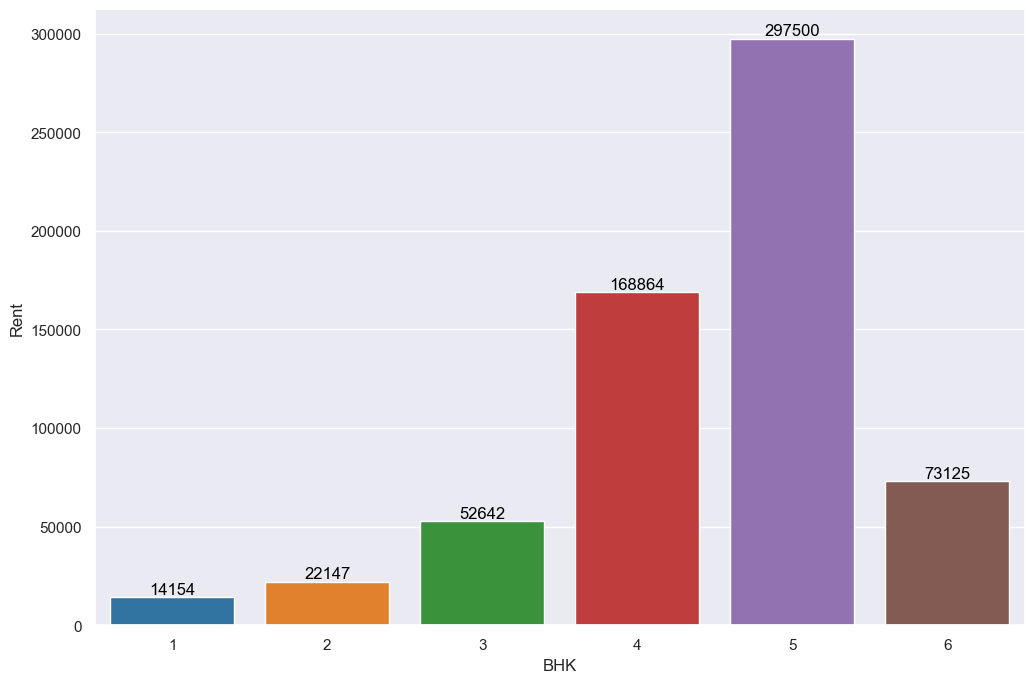

In [31]:
# Plotting Rent VS BHK
plt.figure(figsize=(12, 8))
ax = sb.barplot(x=data['BHK'], 
                y=data['Rent'], 
                palette='tab10',
                errorbar = None,
                hue = data['BHK'],
                legend = False)
plt.ylabel('Rent')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

As seen from the barplot above, houses with 5 BHKs has the highest rent followed by those with 4 BHKs. This **may** indicate that houses with 6 BHKs may be in such a low demand if it is rented as such a high price, thus the rent is lowered.

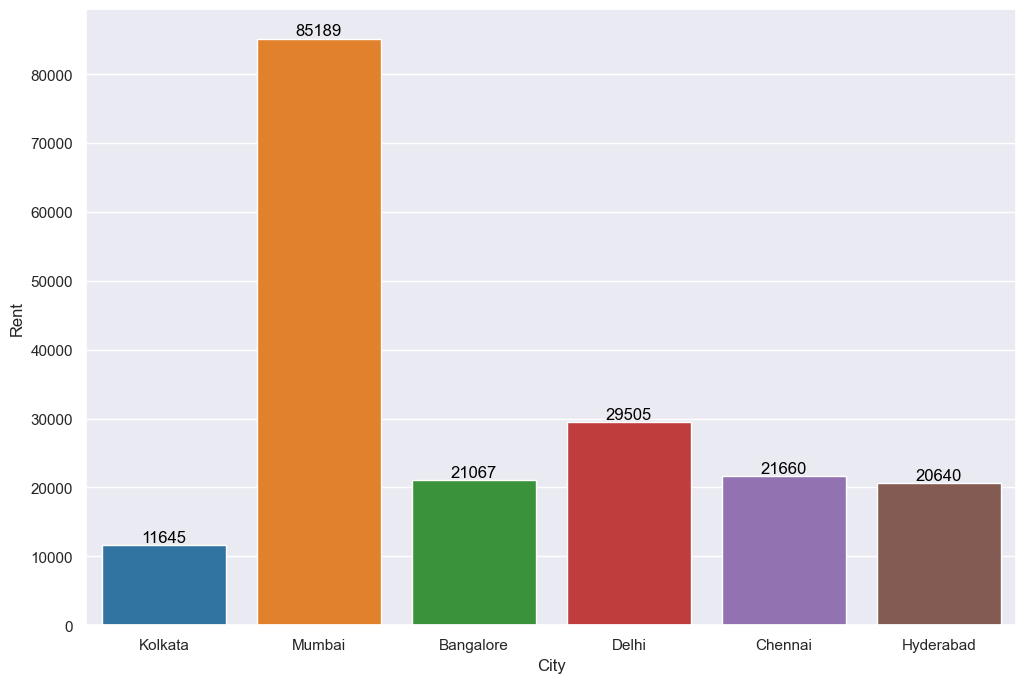

In [32]:
# Plotting Rent VS City
plt.figure(figsize=(12, 8))
ax = sb.barplot(x=data['City'], 
                 y=data['Rent'], 
                 palette='tab10',
                 errorbar = None,
                 hue = data['City'],
                 legend = False)
plt.ylabel('Rent')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

As seen from the barplot above, Mumbai has the highest rent followed by Delhi. This **may** be due to Mumbai having the highest population density in India, leading to higher demand for housing. Kolkata has the lowest rent, which **may** be due to Kolkata being the least developed compared to the other cities, so housing is cheaper.

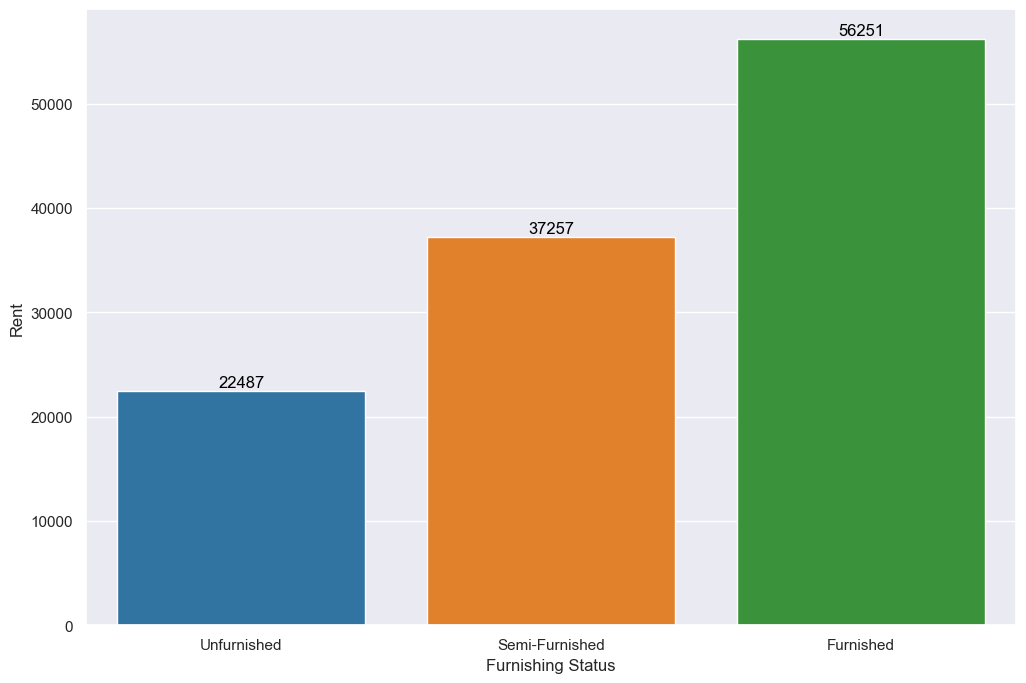

In [33]:
# Plotting Rent VS Furnishing Status
plt.figure(figsize=(12, 8))
ax = sb.barplot(x=data['Furnishing Status'], 
                y=data['Rent'], 
                palette='tab10',
                errorbar = None,
                hue = data['Furnishing Status'],
                legend = False)
plt.ylabel('Rent')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

Houses that are furnished have the highest rents followed by semi-furnished and unfurnished respectively.

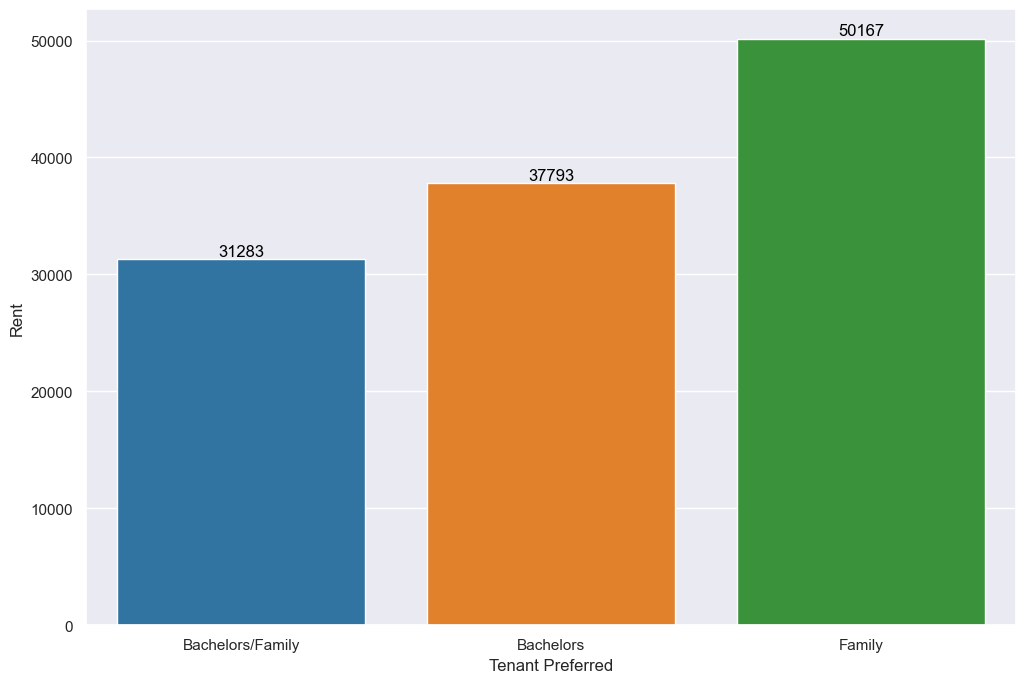

In [34]:
# Plotting Rent VS Furnishing Status
plt.figure(figsize=(12, 8))
ax = sb.barplot(x=data['Tenant Preferred'], 
                y=data['Rent'], 
                palette='tab10',
                errorbar = None,
                hue = data['Tenant Preferred'],
                legend = False)
plt.ylabel('Rent')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

Houses that prefer family have the highest rents. This **may** be due to the house being larger in size to accomodate multiple people.

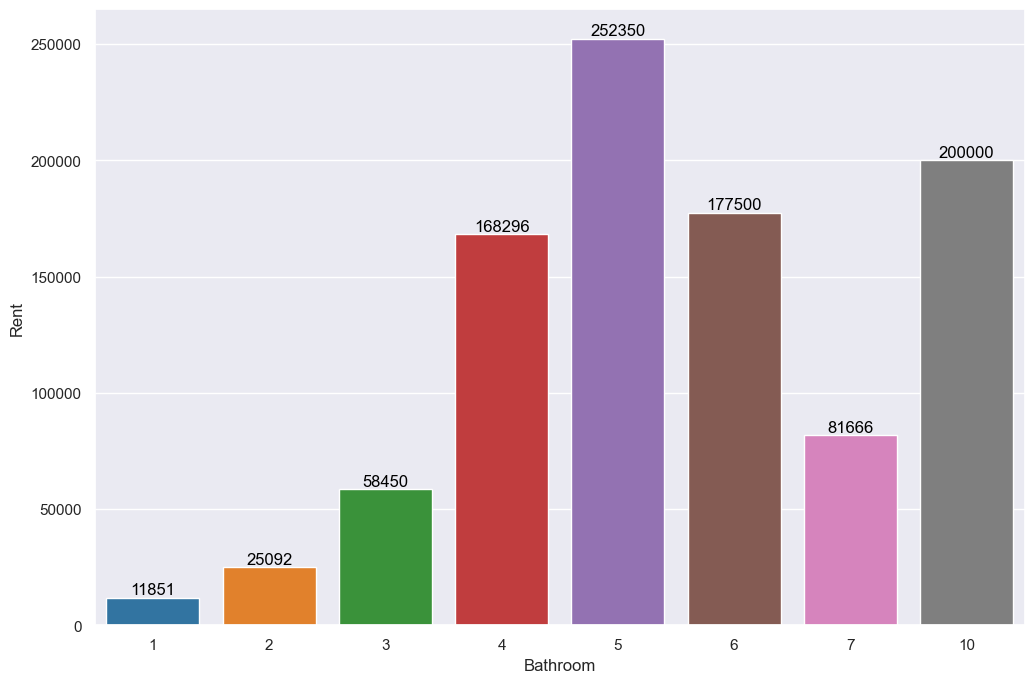

In [35]:
# Plotting Rent VS Furnishing Status
plt.figure(figsize=(12, 8))
ax = sb.barplot(x=data['Bathroom'], 
                y=data['Rent'], 
                palette='tab10',
                errorbar = None,
                hue = data['Bathroom'],
                legend = False)
plt.ylabel('Rent')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

As seen from the barplot above, houses with 5 bathrooms has the highest rent then decreases as the number of bathrooms increases. This **may** indicate that houses with more than 5 bathrooms may be in such a low demand if it is rented as such a high price, thus the rent is lowered.

The outlier are houses with 10 bathrooms, which is explored briefly below.

In [36]:
# Finding number of houses with 10 bathrooms
bath_10 = data[data['Bathroom'] == 10]
print("Number of Houses with 10 bathrooms:", len(bath_10))

Number of Houses with 10 bathrooms: 1


There is only in fact 1 house available for rent with 10 bathrooms, **maybe** indicating that houses with a large number of bathrooms are unecessary and, thus, not in high demand.

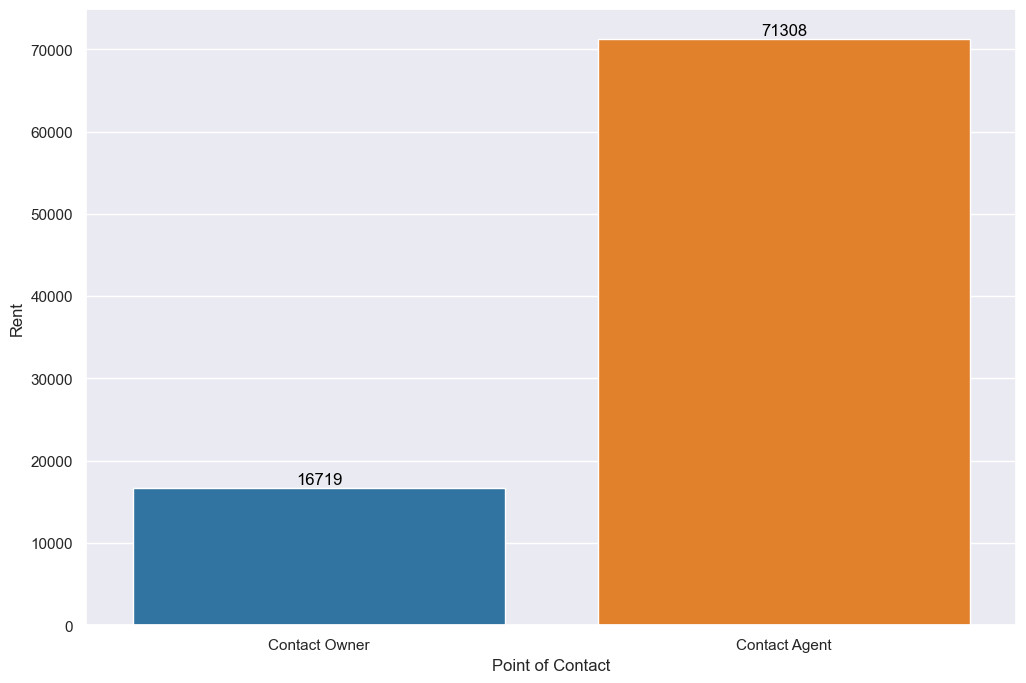

In [37]:
# Plotting Rent VS Furnishing Status
plt.figure(figsize=(12, 8))
ax = sb.barplot(x=data['Point of Contact'], 
                y=data['Rent'], 
                palette='tab10',
                errorbar = None,
                hue = data['Point of Contact'],
                legend = False)
plt.ylabel('Rent')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

Houses with contact agents as the point of contact have the highest rents. This **may** be due to landlords compensating the cost of paying the agent by raising the rent.

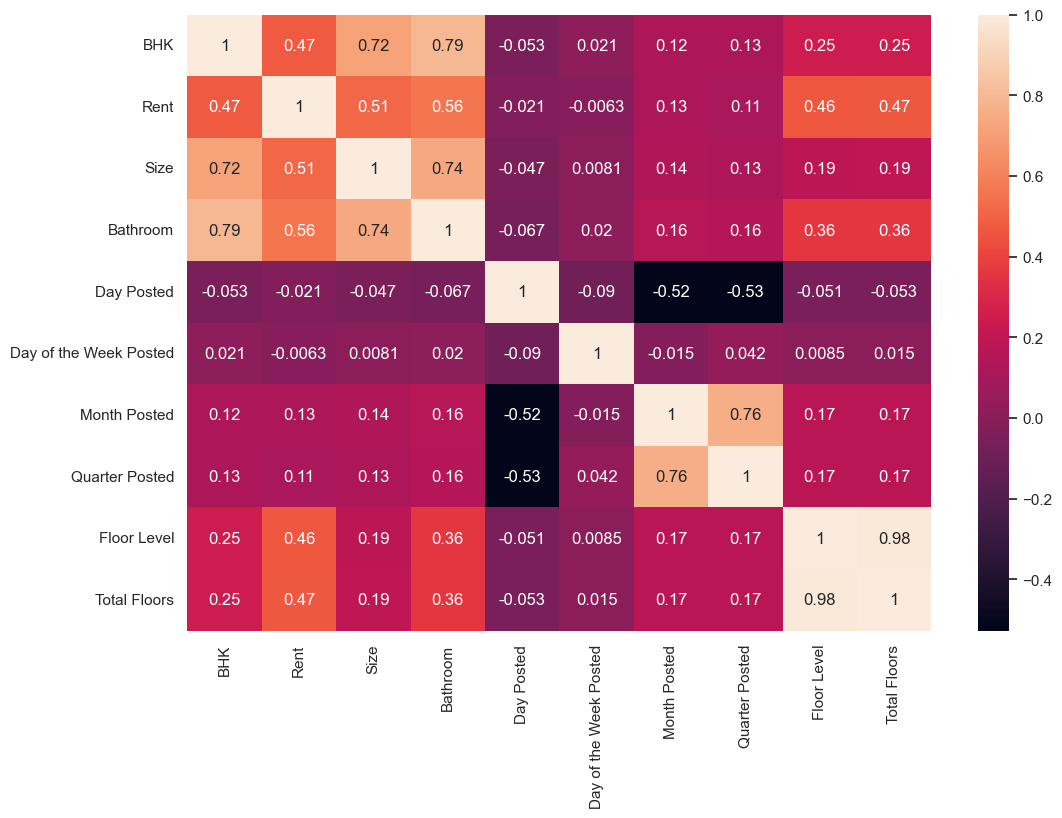

In [38]:
# Heatmap of correlation
corr = data.corr(numeric_only = True)
plt.subplots(figsize=(12,8))
sb.heatmap(corr, vmax = 1, annot=True)
plt.show()

From the heatmap above, it seems that `Bathroom` number has the strongest correlation with `Rent`, followed by `Size`, `BHK`, then `Floor Level`, and `Total Floors`.

## Part 3: Regression & Modeling

#### Part 3.1: Partitioning Data

In [39]:
# Getting dummy variables for categorical variables
# Dropping first to reduce number of variables
original_data = data
data = pd.get_dummies(data, columns = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'], drop_first = True)
data.head()

,BHK,Rent,Size,Bathroom,Day Posted,Day of the Week Posted,Month Posted,Quarter Posted,Floor Level,Total Floors,...,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Owner
0,2,10000,1100,2,18,2,5,2,0,2,...,False,False,False,True,False,False,True,True,False,True
1,2,20000,800,1,13,4,5,2,3,3,...,False,False,False,True,False,True,False,True,False,True
2,2,17000,1000,1,16,0,5,2,3,3,...,False,False,False,True,False,True,False,True,False,True
3,2,10000,800,1,4,0,7,3,2,2,...,False,False,False,True,False,False,True,True,False,True
4,2,7500,850,1,9,0,5,2,2,2,...,False,False,False,True,False,False,True,False,False,True


In [40]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Bathroom', 'Day Posted',
       'Day of the Week Posted', 'Month Posted', 'Quarter Posted',
       'Floor Level', 'Total Floors', 'Area Type_Super Area', 'City_Chennai',
       'City_Delhi', 'City_Hyderabad', 'City_Kolkata', 'City_Mumbai',
       'Furnishing Status_Semi-Furnished', 'Furnishing Status_Unfurnished',
       'Tenant Preferred_Bachelors/Family', 'Tenant Preferred_Family',
       'Point of Contact_Contact Owner'],
      dtype='object')

In [41]:
# Separating data into independent and dependent variables
X = data.drop('Rent', axis = 1)
y = data['Rent']

# Splitting into train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Reshaping the dependent variable into a column
Y_train= y_train.values.reshape(-1,1)
Y_test= y_test.values.reshape(-1,1)

# Standardizing the regressors
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Some machine learning algorithms are sensitive to magnitude in numerical variables, namely K-Nearest Neighbors, Support Vector, Ridge, and Lasso. Therefore, the regressors should be standardized to minimize the downstream effect of magnitudes towards these algorithms.

### Part 3.2: Linear Regression
#### Part 3.2.1: Fitting the Model & Evaluation

We will be using ordinary least squares (OLS) regression. OLS comes with multiple assumptions, namely:
1. The error/noise term's population mean is 0.
2. The error/noise term's variance is constant across all samples.
3. Each sample of the error term is independent of each other.
4. The error/noise term follows a normal distribution, N ~ (0, σ2)

These assumptions will be tested in the residual analysis section later.

In [43]:
# Fitting a linear regression model
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_hat = lr.predict(X_test)

# Retrieving the model intercepts, coefficients, and R-Squared Value
print("Linear Model Intercept:", lr.intercept_)
print("Linear Model Coefficients:", lr.coef_)

Linear Model Intercept: [34864.28196982]
Linear Model Coefficients: [[ 2709.93865302 24686.71815073  7308.70370923  -755.92613288
   -715.7413849    156.39827799 -1810.19684498  1244.84477415
   6928.93083347 -2355.08766151  -670.06856679  5260.05078748
  -4267.51269284   866.17114445 19585.53312938 -5286.31057262
  -4232.96640997  2325.07938418  -968.21620072 -1710.05266511]]


In [44]:
# Evaluation metrics
mae_lr = mean_absolute_error(Y_test, Y_hat)
mse_lr =  mean_squared_error(Y_test, Y_hat)
rmse_lr =  np.sqrt(mse_lr)

# Displaying the evaluation metrics
print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("\nR-Squared Value:", lr.score(X_test, Y_test))
print("R-Squared Adjusted Value:", 1 - ((1 - lr.score(X_test, Y_test)) * (len(Y_test)-1) / (len(Y_test)-X_test.shape[1]-1)))

Mean Absolute Error: 21125.555643760486
Mean Squared Error: 1256192283.5931127
Root Mean Squared Error: 35442.80298725134

R-Squared Value: 0.5606231263216341
R-Squared Adjusted Value: 0.551112804380544


The regressors in the model can explain about 56.06% of the variance in response.

Considering the error and the R-Squared values shown above, the linear regression model does not fit the data well.

#### Part 3.2.2: ANOVA Analysis

In [45]:
# Conducting ANOVA
def SSr(y, y_hat):
    total_SSr = 0
    y_mean = y.mean()
    for y_hat_ in y_hat:
        total_SSr += (y_hat_ - y_mean)**2
    return total_SSr

def SSe(y, y_hat):
    total_SSe = 0
    for y_, y_hat_ in zip(y, y_hat):
        total_SSe += (y_ - y_hat_)**2
    return total_SSe

# Conducting ANOVA Analysis on the entire dataset
sc_X = StandardScaler()
X_anova = sc_X.fit_transform(X)

# Fitting a new Linear Regression model
lr_anova = LinearRegression()
lr_anova.fit(X_anova, y)

LinearRegression()

In [46]:
# Calculating the predicted values and explained/unexplained variance
y_anova = lr_anova.predict(X_anova)
SSr_val = SSr(y, y_anova)
SSe_val = SSe(y, y_anova)

# Calculated SSr and SSe of the entire dataset
print("Explained Variance:", SSr_val)
print("Unexplained Variance:", SSe_val)

Explained Variance: 8856418960929.184
Unexplained Variance: 8041806662072.729


In [47]:
# Defining the number of regressors, coefficients, and samples
k = 20 # Number of Regressors, based on the length of the coefficients list
p = k + 1 # One greater than k since there is an intercept
n = len(y) # Number of data points
print("Number of regressors:", k)
print("Number of parameters:",p)
print("Number of samples:", n)

# Calculating Fo value
msr = SSr_val/k
mse = SSe_val/(n-p)
Fo = msr/mse
print("\nFo value:",Fo)

Number of regressors: 20
Number of parameters: 21
Number of samples: 4722

Fo value: 258.85990104490503


In [48]:
# Finding the f value
alpha = 0.05
f.ppf(q=1-alpha, dfn=k, dfd=(n-p))

1.5727619381201117

As seen from calculations above, the Fo value is greater than the value of F(0.05, k, n-p). Therefore, **there is significant linear relationship** between at least one of the regressors with the response variables. 

#### Part 3.2.3: Residual Analysis

In [49]:
# Residual Analysis on the test dataset
residual = Y_test - Y_hat
residual_meaned = residual - residual.mean()
res_standardized = residual_meaned / np.sqrt(residual_meaned.var())

# Confirm that residuals have been standardized
print("Residuals Mean:", res_standardized.mean()) # Should be 0
print("Residuals Standard Deviation:", np.sqrt(res_standardized.var())) # Should be 1

Residuals Mean: 3.759485374392065e-18
Residuals Standard Deviation: 1.0


The mean is close enough to 0, and the standard deviation is close enough to 1. Standardizing the residuals is helpful for residual analysis to analyze whether the assumptions of OLS hold, particularly for the assumption that the error/noise term follows a normal distribution with 0 mean and constant variance. Converting the residuals into a standard normal distribution, AKA z-distribution (normal distribution with 0 mean and 1 variance), helps to identify the amount of outliers.

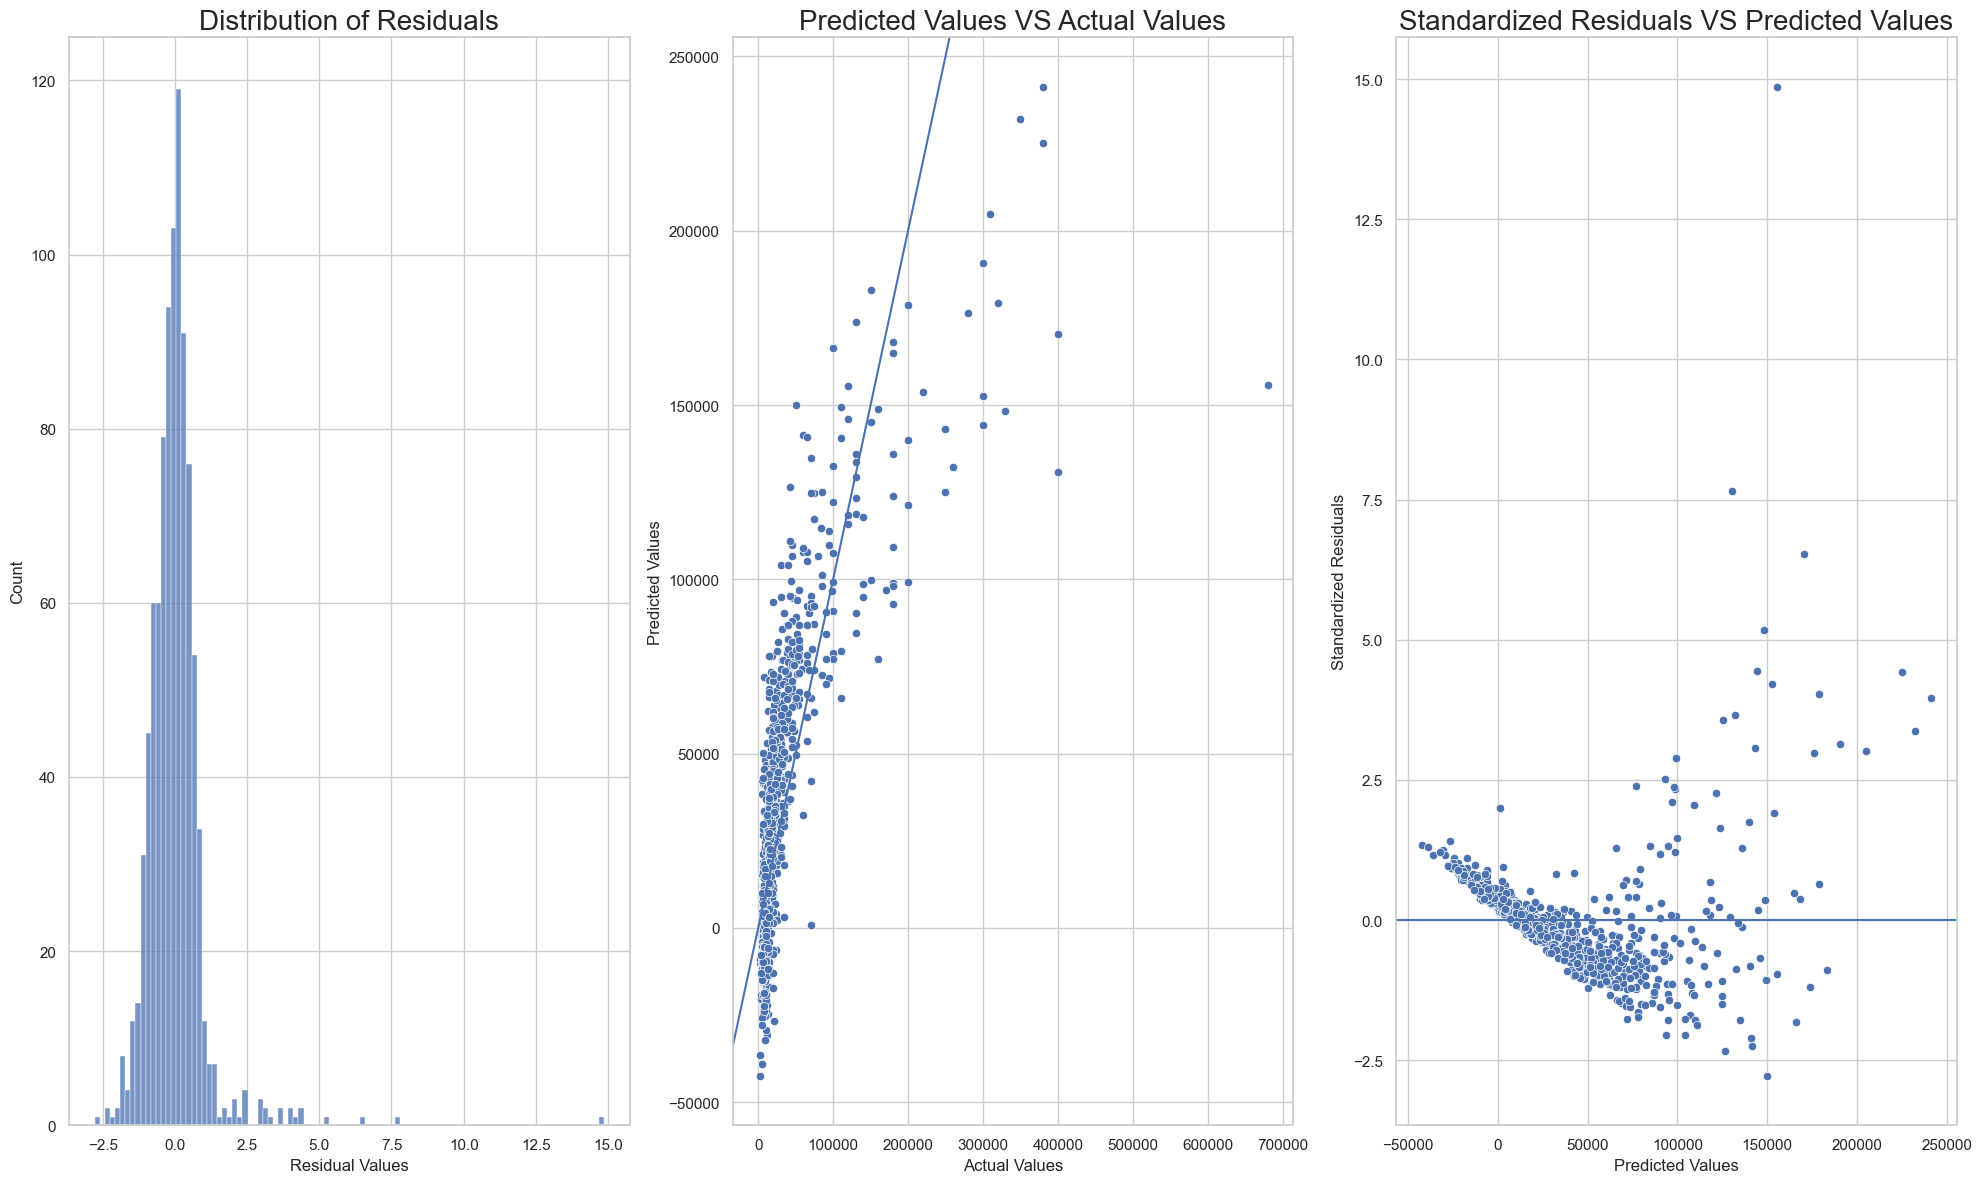

In [50]:
# Flattening arrays for graphs
Y_hat = Y_hat.flatten()
Y_test = Y_test.flatten()
res_standardized = res_standardized.flatten()

# Plotting Standardized Residuals
sb.set_style('whitegrid')
fig,ax = plt.subplots(1, 3, figsize=(20,12))
ax1 = sb.histplot(res_standardized, ax = ax[0])
ax2 = sb.scatterplot(x = Y_test, y = Y_hat, ax = ax[1])
ax2.axline([0, 0], [1, 1])
ax3 = sb.scatterplot(x = Y_hat, y = res_standardized, ax = ax[2])
ax3.axline([0,0], [1,0])

# Setting titles and labels
ax1.set_title("Distribution of Residuals", fontsize = 20)
ax1.set_xlabel("Residual Values")

ax2.set_title("Predicted Values VS Actual Values", fontsize = 20)
ax2.set_xlabel("Actual Values")
ax2.set_ylabel("Predicted Values")

ax3.set_title("Standardized Residuals VS Predicted Values", fontsize = 20)
ax3.set_xlabel("Predicted Values")
ax3.set_ylabel("Standardized Residuals")

plt.tight_layout()
plt.show()

The first plot shows that the residuals roughly follow a normal distribution. Despite some outliers, the second plot shows an increasing trend in predicted and actual values. The third plot shows that the points crowd around the 0 line, and a linear downward trend is observed in the third plot instead of being randomly distributed.

From the observations of the above plots, although the residuals seem to follow a normal distribution in the first graph, the second graph shows that many points are far from the 45-degree line, indicating that, although the correlation between the predicted and actual values is not strong. Furthermore, the third graph shows a clear trend in the standardized residuals VS predicted values. As such, the linear regression model might not fit this dataset well. Other regressions or algorithms that can better fit the dataset should be explored.

In [51]:
# Checking the number of samples that fall under [-3, 3]
within_interval = sum((3 >= res_standardized) & (res_standardized >= -3))
print("Number of points that lie within [-3, 3]:", within_interval, "out of", len(res_standardized))
print("Percentage:", str(round(within_interval/len(res_standardized)*100, 2)) + "%")

Number of points that lie within [-3, 3]: 930 out of 945
Percentage: 98.41%


98.41% of the residuals lie within [-3, 3]. Given that in a normal distribution, 99.7% lies within [-3, 3], this output indicates that there may be some outliers. These outliers can be removed to improve the accuracy of the Linear Regression model.

### Part 3.3: Machine Learning Modeling

#### Part 3.3.1 Training the Machine Learning Models

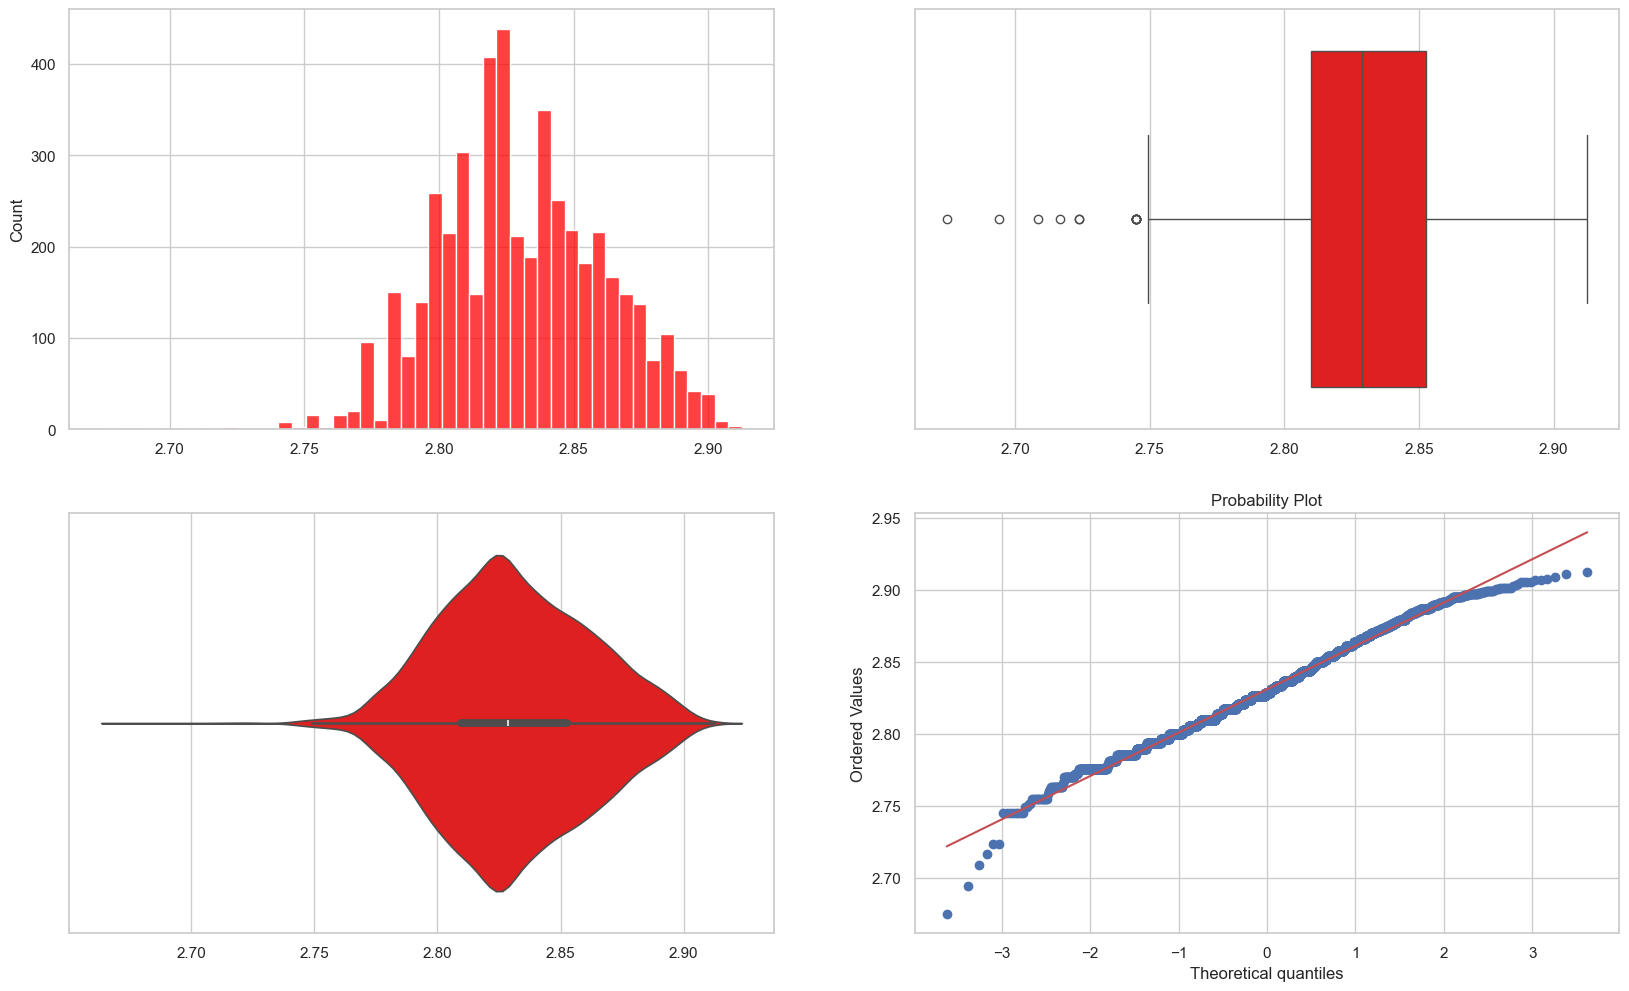

In [52]:
# Using boxcox transformation to convert the data into a more normally distributed form
bc = boxcox(y)
y = bc[0]
lambda_ = bc[1]

# Plotting the transformed response variable
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sb.histplot(x = y, color='red', ax= ax[0, 0])
ax2 = sb.boxplot(x = y, ax= ax[0, 1], color= 'red')
ax3 = sb.violinplot(x = y, ax= ax[1, 0], color= 'red')
ax4 = probplot(y, plot=pylab)
pylab.show()

As seen from the probability plot, the data points align closer to the line as compared to those before the Box-Cox transformation, indicating that the transformed data points better resemble a normal distribution than they did before the Box-Cox transformation.

In [53]:
# Splitting into train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the regressors
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
# Getting all the models that will be used
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Bayesian Ridge': BayesianRidge(),
    'K-Nearest Neighbor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state = 42),
    'Gradient Boosting': GradientBoostingRegressor(random_state = 42),
    'Random Forest' : RandomForestRegressor(random_state = 42),
    'Support Vector': SVR(),
    'CatBoost': CatBoostRegressor(verbose = 0, random_state = 42),
    'LightGBM': LGBMRegressor(verbose = 0, random_state = 42),
    'XGBoost' : XGBRegressor(random_state = 42),    
}

In [55]:
# Creating results dictionary to store evaluation metrics of each model
results = {}
feature_importance = {}

# Training all models and storing results in a dictionary
for name, model in models.items():
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    mae = mean_absolute_error(y_test, prediction)
    mse =  mean_squared_error(y_test, prediction)
    rmse =  np.sqrt(mse)
    r2 = model.score(X_test, y_test)
    r2_adj = 1 - ((1 - model.score(X_test, y_test)) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1))
    results[name] = [mae, mse, rmse, r2, r2_adj]
    try:
        feature_importance[name] = model.feature_importances_
    except:
        pass
    print(name, "has been trained.")

Ridge has been trained.
Lasso has been trained.
Bayesian Ridge has been trained.
K-Nearest Neighbor has been trained.
Decision Tree has been trained.
Gradient Boosting has been trained.
Random Forest has been trained.
Support Vector has been trained.
CatBoost has been trained.
LightGBM has been trained.
XGBoost has been trained.


#### Part 3.3.2 Plotting the Evaluation Metrics

In [56]:
# Converting the "results" dictionary into a data frame and labeling the columns
results_df = pd.DataFrame(results).T.rename(columns={0: 'MAE', 1: 'MSE', 2: 'RMSE', 3: 'R2', 4:'R2 Adjusted'})
results_df

,MAE,MSE,RMSE,R2,R2 Adjusted
Ridge,0.010984,0.000218,0.014750,0.756505,0.751234
Lasso,0.023917,0.000898,0.029963,-0.004720,-0.026467
Bayesian Ridge,0.010984,0.000218,0.014750,0.756508,0.751238
K-Nearest Neighbor,0.011823,0.000257,0.016019,0.712810,0.706594
Decision Tree,0.013796,0.000348,0.018654,0.610579,0.602150
Gradient Boosting,0.010360,0.000202,0.014221,0.773685,0.768787
Random Forest,0.010492,0.000207,0.014387,0.768341,0.763327
Support Vector,0.035279,0.001809,0.042537,-1.024922,-1.068752
CatBoost,0.009927,0.000189,0.013763,0.788011,0.783423
LightGBM,0.010340,0.000203,0.014260,0.772415,0.767489


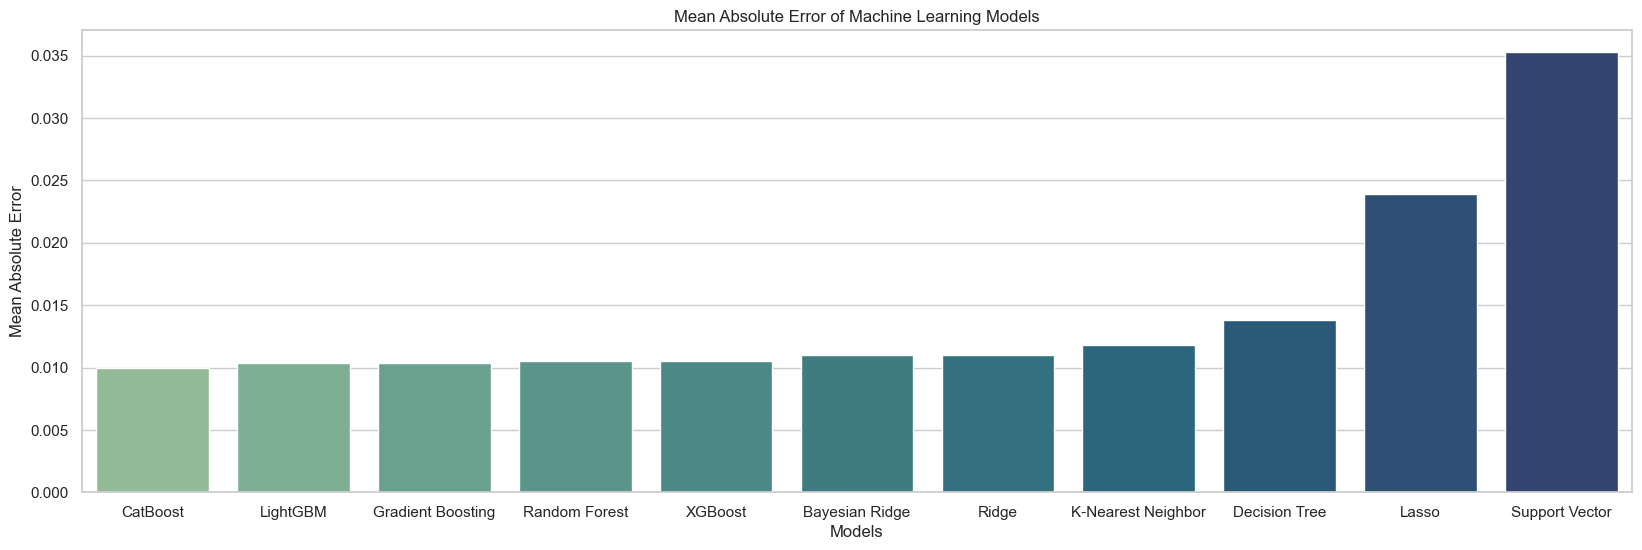

In [57]:
# Plotting Mean Absolute Error of each model
mae_ser = results_df['MAE'].sort_values()
plt.figure(figsize = (20, 6))
sb.barplot(x= mae_ser.index, y = mae_ser, palette = 'crest', hue = mae_ser.index, legend = False)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error of Machine Learning Models');

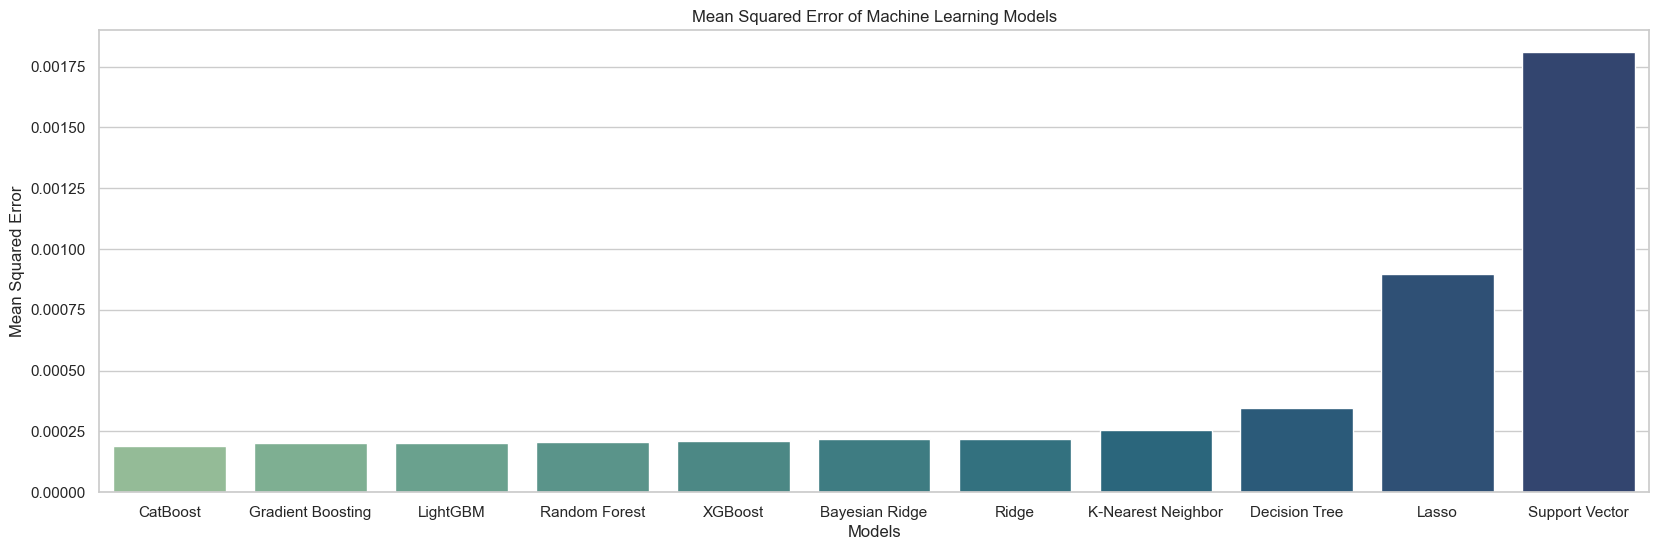

In [58]:
# Plotting Mean Squared Error of each model
mse_ser = results_df['MSE'].sort_values()
plt.figure(figsize = (20, 6))
sb.barplot(x= mse_ser.index, y = mse_ser, palette = 'crest', hue = mse_ser.index, legend = False)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Machine Learning Models');

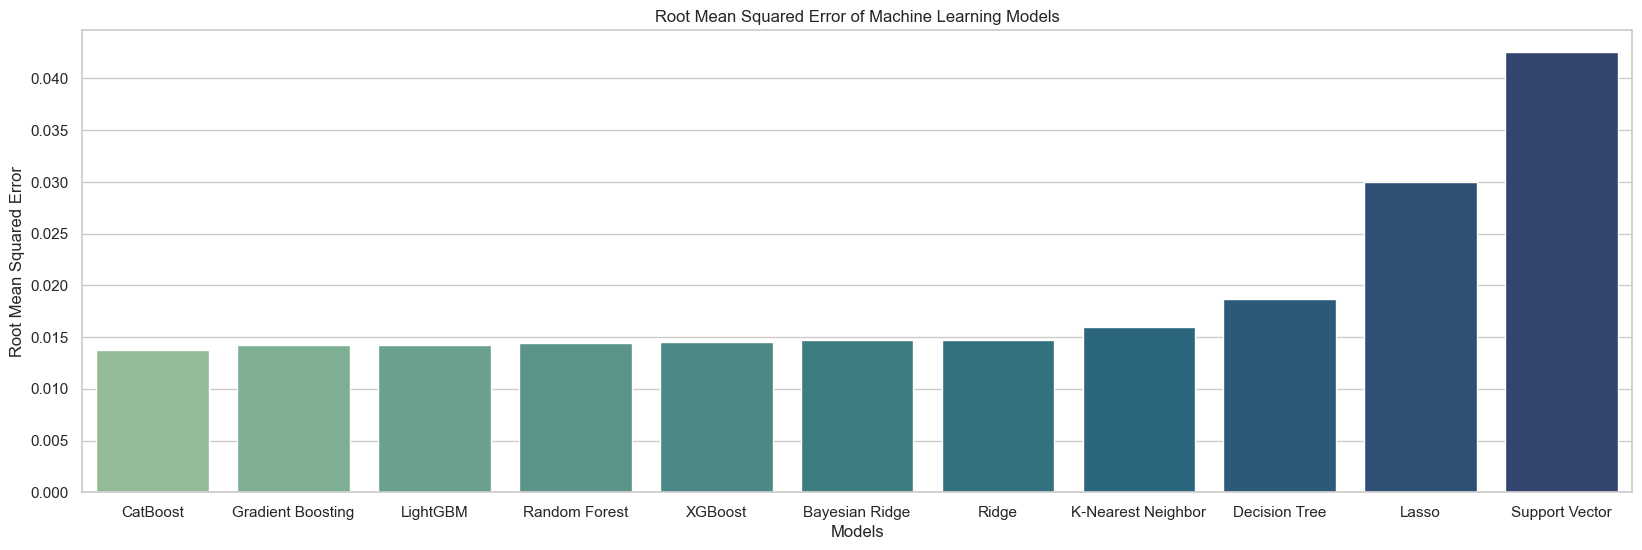

In [59]:
# Plotting Root Mean Squared Error of each model
rmse_ser = results_df['RMSE'].sort_values()
plt.figure(figsize = (20, 6))
sb.barplot(x= rmse_ser.index, y = rmse_ser, palette = 'crest', hue = rmse_ser.index, legend = False)
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error of Machine Learning Models');

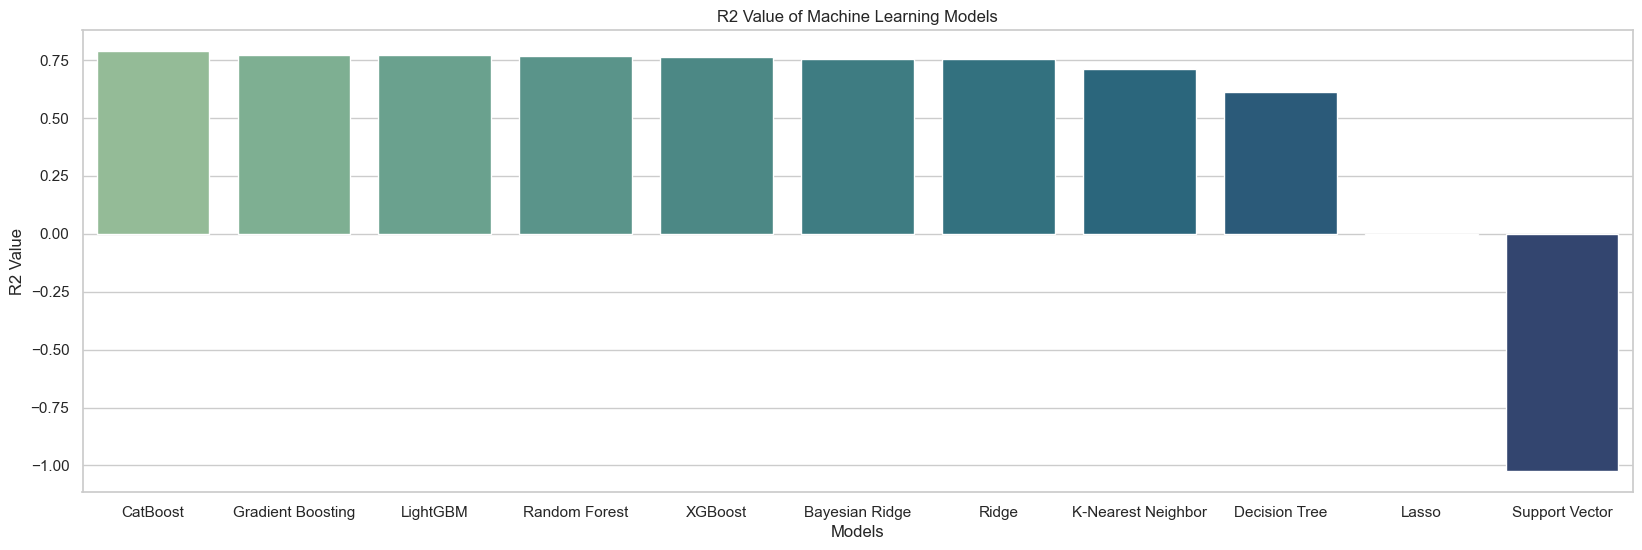

In [60]:
# Plotting R2 value of each model
r2_ser = results_df['R2'].sort_values(ascending = False)
plt.figure(figsize = (20, 6))
sb.barplot(x= r2_ser.index, y = r2_ser, palette = 'crest', hue = r2_ser.index, legend = False)
plt.xlabel('Models')
plt.ylabel('R2 Value')
plt.title('R2 Value of Machine Learning Models');

From the graphs above, `CatBoost`, `LightGBM`, `Gradient Boosting`, `Random Forest`, and `XGBoost` in order have the smallest MAE. On the other hand, `CatBoost`, `Gradient Boosting`, `LightGBM`, `Random Forest`, and `XGBoost` in order have the smallest MSE and RMSE and largest R2 values. These 5 algorithms will be used to determine the critical variables via feature importance.

#### Part 3.3.3 Feature Importance

In [61]:
# Getting feature names for plotting
feature_names = list(X.columns)

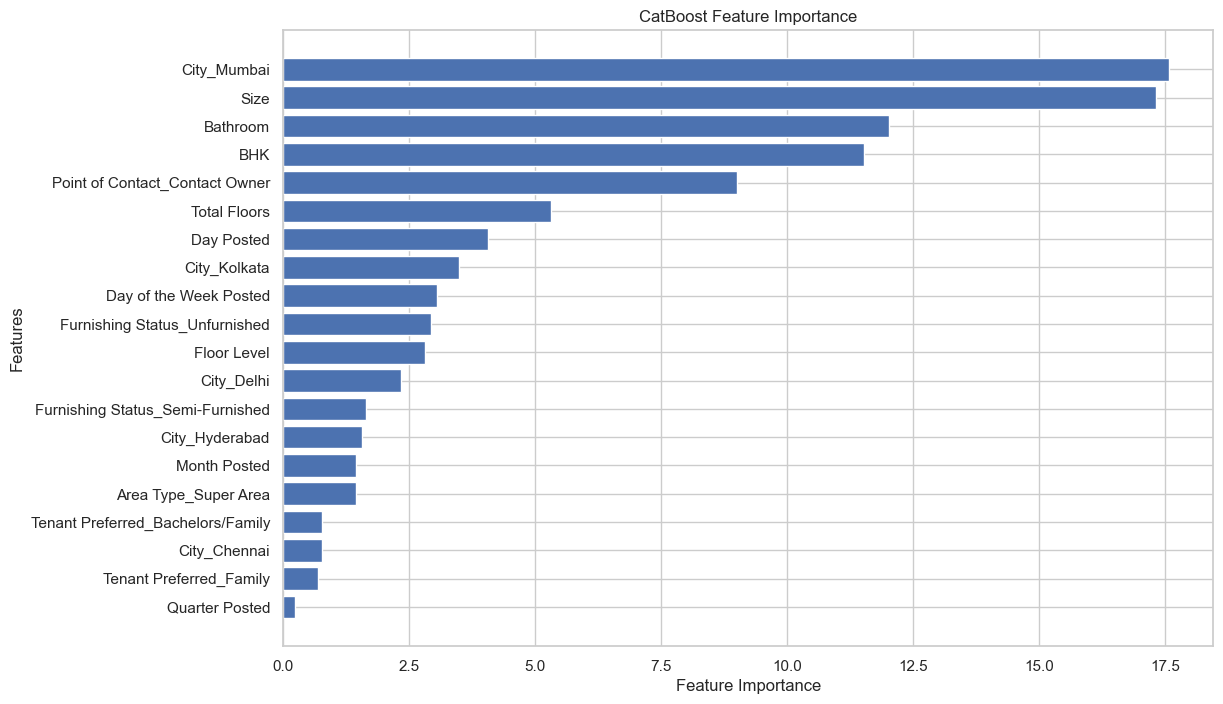

In [62]:
# Feature importance of the CatBoost model
cat_feature_importance = feature_importance['CatBoost']
cat_sorted_idx = np.argsort(cat_feature_importance)
cat_sorted_feature_importance = cat_feature_importance[cat_sorted_idx]
cat_sorted_feature_names = [feature_names[i] for i in cat_sorted_idx]

# Plotting it on a graph
plt.figure(figsize=(12, 8))
plt.barh(range(len(cat_sorted_feature_importance)), cat_sorted_feature_importance, align='center')
plt.yticks(range(len(cat_sorted_feature_importance)), cat_sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance')
plt.show()

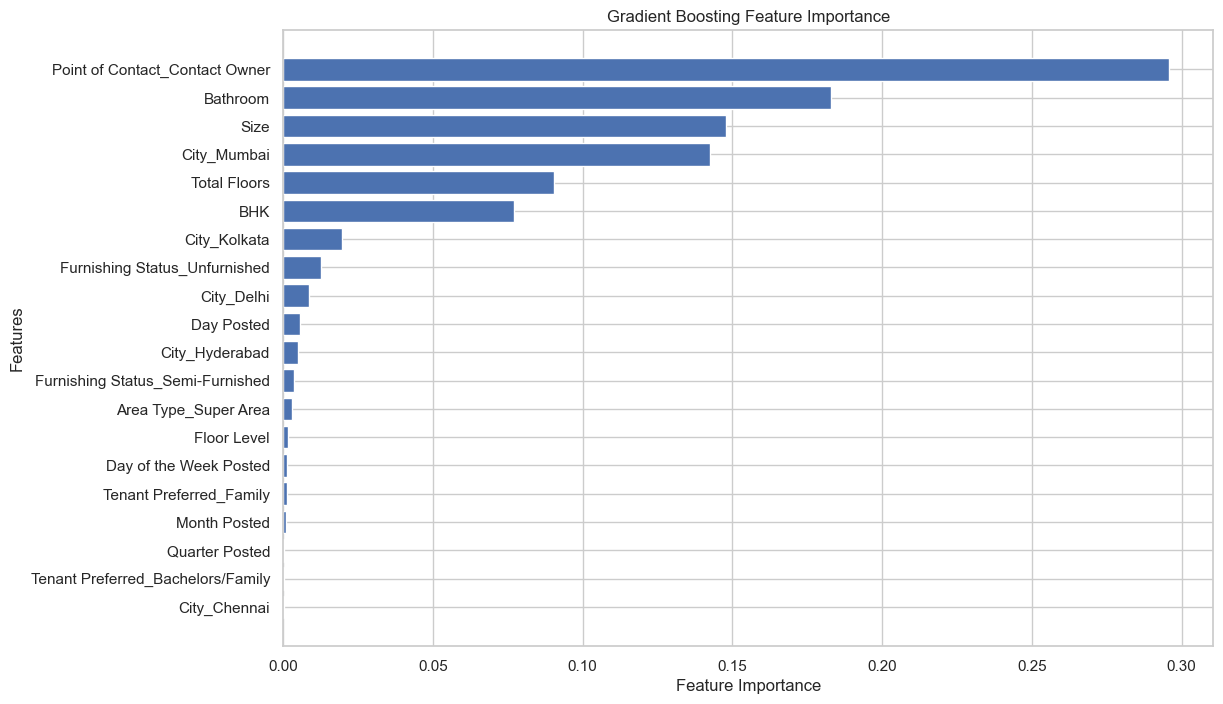

In [63]:
# Feature importance of the Gradient Boosting model
gb_feature_importance = feature_importance['Gradient Boosting']
gb_sorted_idx = np.argsort(gb_feature_importance)
gb_sorted_feature_importance = gb_feature_importance[gb_sorted_idx]
gb_sorted_feature_names = [feature_names[i] for i in gb_sorted_idx]

# Plotting it on a graph
plt.figure(figsize=(12, 8))
plt.barh(range(len(gb_sorted_feature_importance)), gb_sorted_feature_importance, align='center')
plt.yticks(range(len(gb_sorted_feature_importance)), gb_sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Gradient Boosting Feature Importance')
plt.show()

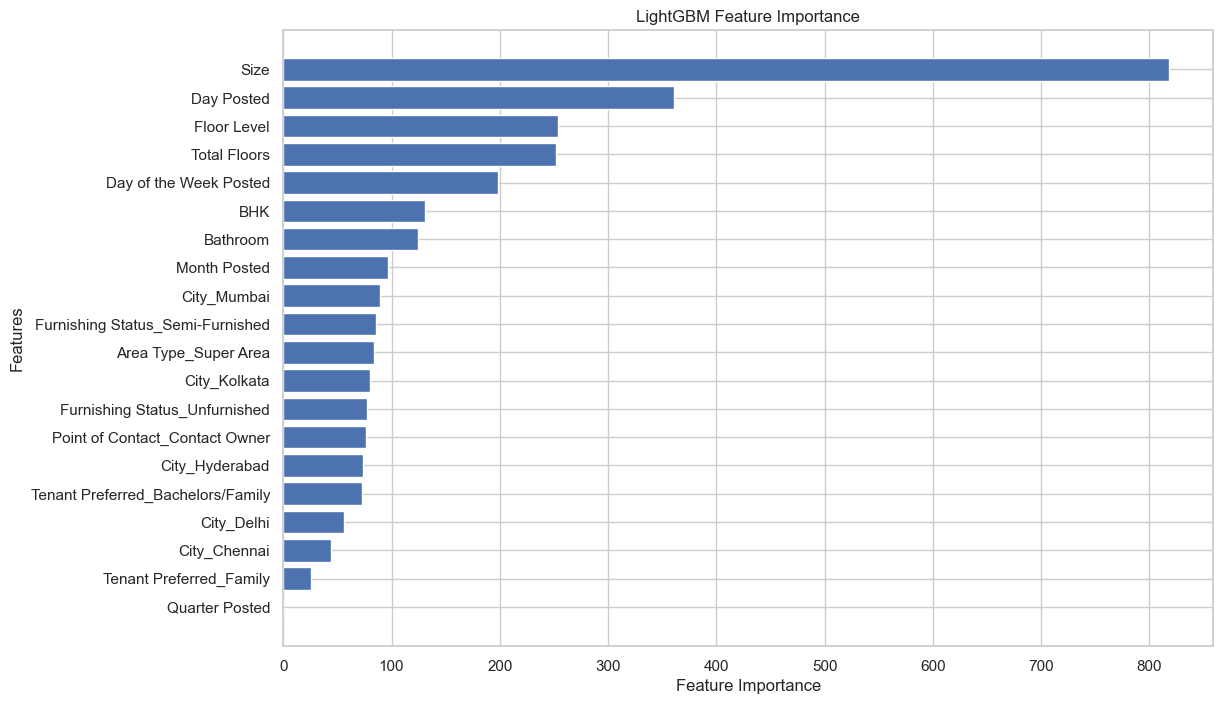

In [64]:
# Feature importance of the LightGBM model
lgbm_feature_importance = feature_importance['LightGBM']
lgbm_sorted_idx = np.argsort(lgbm_feature_importance)
lgbm_sorted_feature_importance = lgbm_feature_importance[lgbm_sorted_idx]
lgbm_sorted_feature_names = [feature_names[i] for i in lgbm_sorted_idx]

# Plotting it on a graph
plt.figure(figsize=(12, 8))
plt.barh(range(len(lgbm_sorted_feature_importance)), lgbm_sorted_feature_importance, align='center')
plt.yticks(range(len(lgbm_sorted_feature_importance)), lgbm_sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('LightGBM Feature Importance')
plt.show()

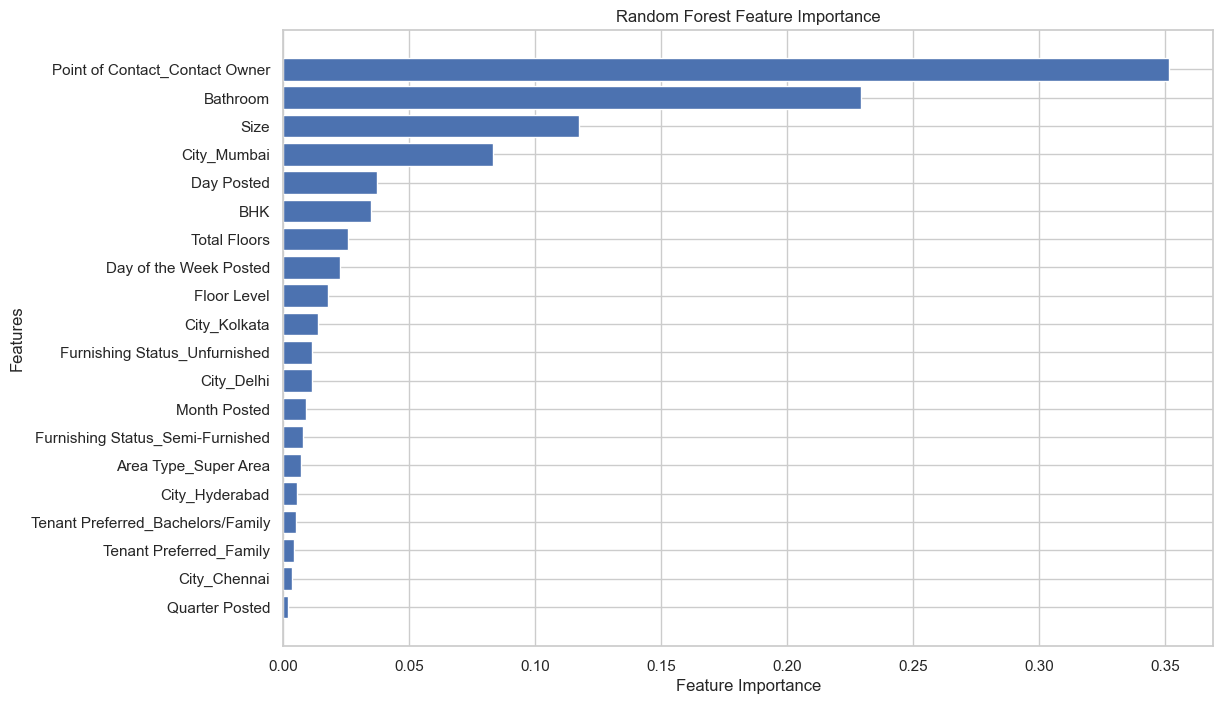

In [65]:
# Feature importance of the Random Forest model
rf_feature_importance = feature_importance['Random Forest']
rf_sorted_idx = np.argsort(rf_feature_importance)
rf_sorted_feature_importance = rf_feature_importance[rf_sorted_idx]
rf_sorted_feature_names = [feature_names[i] for i in rf_sorted_idx]

# Plotting it on a graph
plt.figure(figsize=(12, 8))
plt.barh(range(len(rf_sorted_feature_importance)), rf_sorted_feature_importance, align='center')
plt.yticks(range(len(rf_sorted_feature_importance)), rf_sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

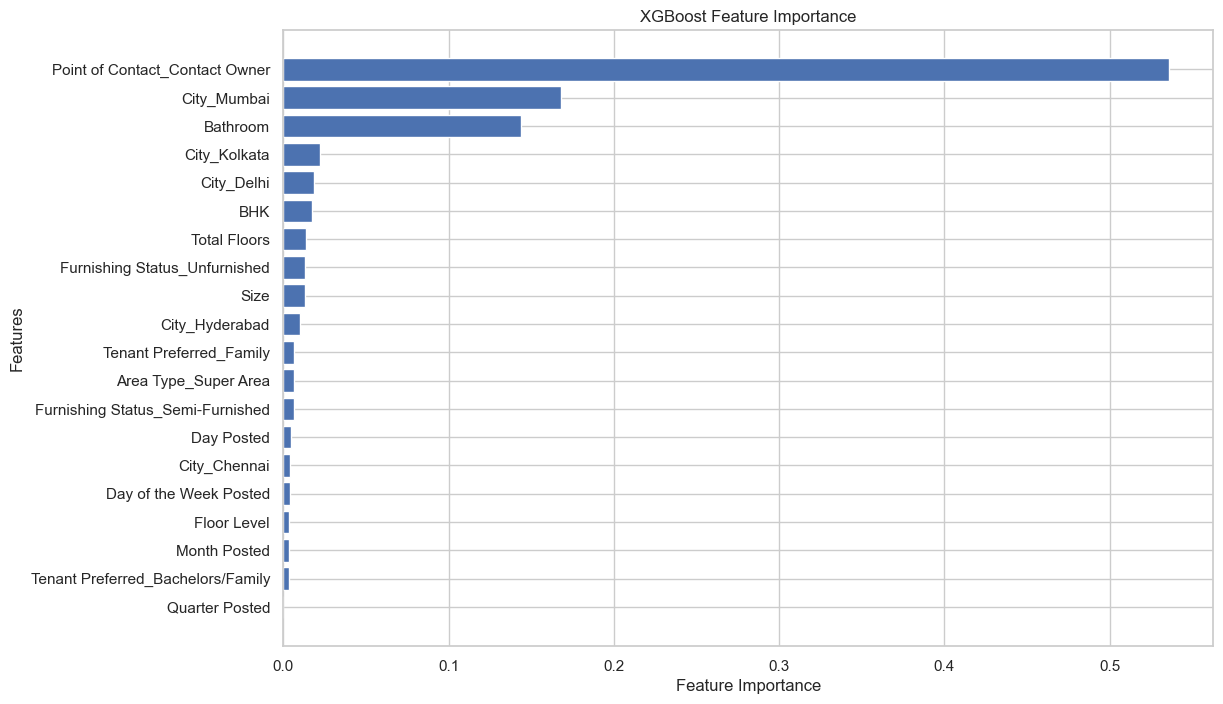

In [66]:
# Feature importance of the XGBoost model
xgb_feature_importance = feature_importance['XGBoost']
xgb_sorted_idx = np.argsort(xgb_feature_importance)
xgb_sorted_feature_importance = xgb_feature_importance[xgb_sorted_idx]
xgb_sorted_feature_names = [feature_names[i] for i in xgb_sorted_idx]

# Plotting it on a graph
plt.figure(figsize=(12, 8))
plt.barh(range(len(xgb_sorted_feature_importance)), xgb_sorted_feature_importance, align='center')
plt.yticks(range(len(xgb_sorted_feature_importance)), xgb_sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

These are the selected critical features by model:
- CatBoost: `City_Mumbai`, `Size`, `Bathroom`, `BHK`, `Point of Contact_Contact Owner`
- Gradient Boosting: `Point of Contact_Contact Owner`, `Bathroom`, `Size`, `City_Mumbai`
- LightGBM: `Size`, `Day Posted`, `Floor Level`, `Total Floors`, `Day of the Week Posted`
- Random Forest: `Point of Contact_Contact Owner`, `Bathroom`, `Size`, `City_Mumbai`
- XGBoost: `Point of Contact_Contact Owner`, `City_Mumbai`, `Bathroom`

For the purposes of this project, the feature importance by the LightGBM model will not be considered since they are distinctly different than the rest. Thus, the significant features chosen will be `Point of Contact`, `Bathroom`, `Size`, and `City`. Since `Size` is dependent on `Area Type`, then `Area Type` will also be included.

### Part 4: Improvements

#### Part 4.1: Preparing the Dataset

In [67]:
# Initiate a new variable for the new dataset
data = original_data[['Rent', 'Bathroom','Size','City','Point of Contact','Area Type']]

# Getting dummy variables for categorical variables
# Dropping first to reduce number of variables
data = pd.get_dummies(data, columns = ['City', 'Point of Contact', 'Area Type'], drop_first = True)
data.head()

,Rent,Bathroom,Size,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Point of Contact_Contact Owner,Area Type_Super Area
0,10000,2,1100,False,False,False,True,False,True,True
1,20000,1,800,False,False,False,True,False,True,True
2,17000,1,1000,False,False,False,True,False,True,True
3,10000,1,800,False,False,False,True,False,True,True
4,7500,1,850,False,False,False,True,False,True,False


In [68]:
# Defining the regressors and response
X = data.drop('Rent', axis = 1)
y = data['Rent']
bc = boxcox(y)
y = bc[0]
lambda_ = bc[1]

# Splitting into train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Standardizing the regressors
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Part 4.2: Training the Machine Learning Models

In [70]:
# Defining the new models
new_models = {
    'Gradient Boosting': GradientBoostingRegressor(random_state = 42),
    'Random Forest' : RandomForestRegressor(random_state = 42),
    'CatBoost': CatBoostRegressor(verbose = 0, random_seed = 42),
    'XGBoost' : XGBRegressor(random_state = 42),    
}

In [71]:
# Creating new results dictionary to store evaluation metrics of each model
results = {}

# Training all models and storing results in a dictionary
for name, model in new_models.items():
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    mae = mean_absolute_error(y_test, prediction)
    mse =  mean_squared_error(y_test, prediction)
    rmse =  np.sqrt(mse)
    r2 = model.score(X_test, y_test)
    r2_adj = 1 - ((1 - model.score(X_test, y_test)) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1))
    results[name] = [mae, mse, rmse, r2, r2_adj]
    print(name, "has been trained.")

Gradient Boosting has been trained.
Random Forest has been trained.
CatBoost has been trained.
XGBoost has been trained.


#### Part 4.3: Plotting the Evaluation Metrics

In [72]:
# Converting the "results" dictionary into a data frame and labeling the columns
new_results_df = pd.DataFrame(results).T.rename(columns={0: 'MAE', 1: 'MSE', 2: 'RMSE', 3: 'R2', 4:'R2 Adjusted'})
new_results_df

,MAE,MSE,RMSE,R2,R2 Adjusted
Gradient Boosting,0.010812,0.000221,0.014850,0.753211,0.750835
Random Forest,0.011594,0.000254,0.015951,0.715239,0.712498
CatBoost,0.010772,0.000223,0.014943,0.750116,0.747711
XGBoost,0.011092,0.000236,0.015364,0.735814,0.733271


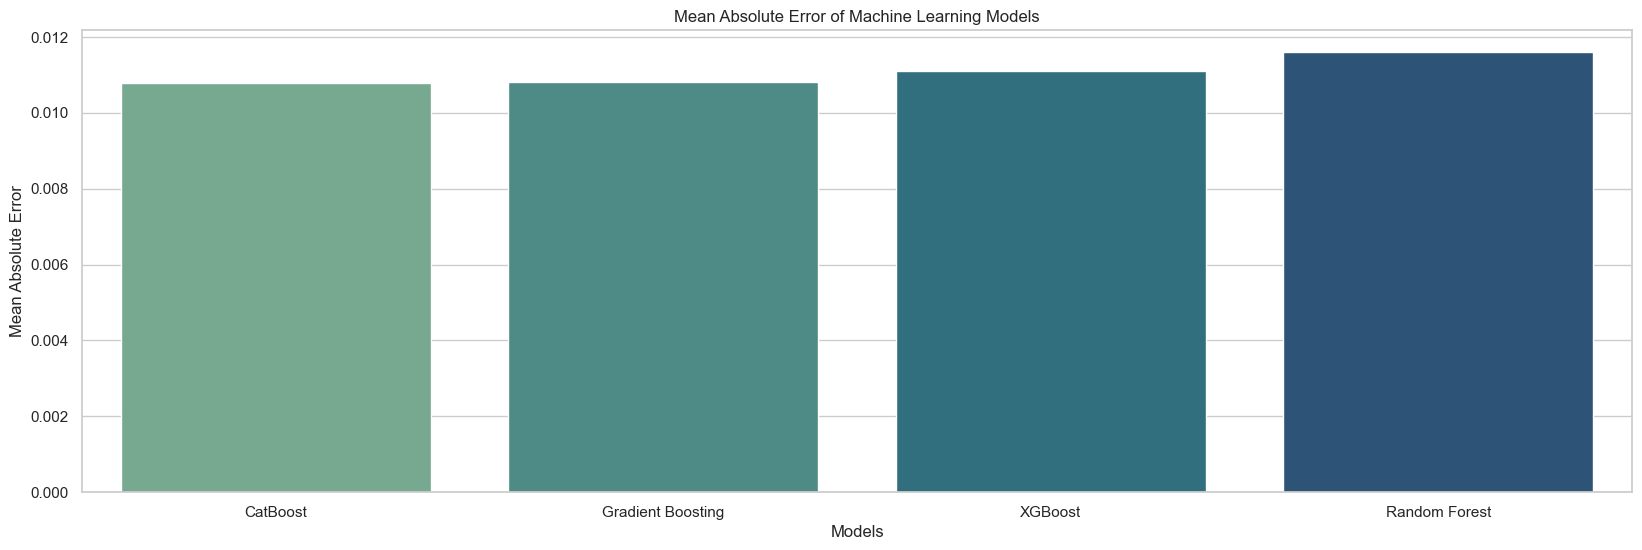

In [73]:
# Plotting Mean Absolute Error of each model
mae_ser = new_results_df['MAE'].sort_values()
plt.figure(figsize = (20, 6))
sb.barplot(x= mae_ser.index, y = mae_ser, palette = 'crest', hue = mae_ser.index, legend = False)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error of Machine Learning Models');

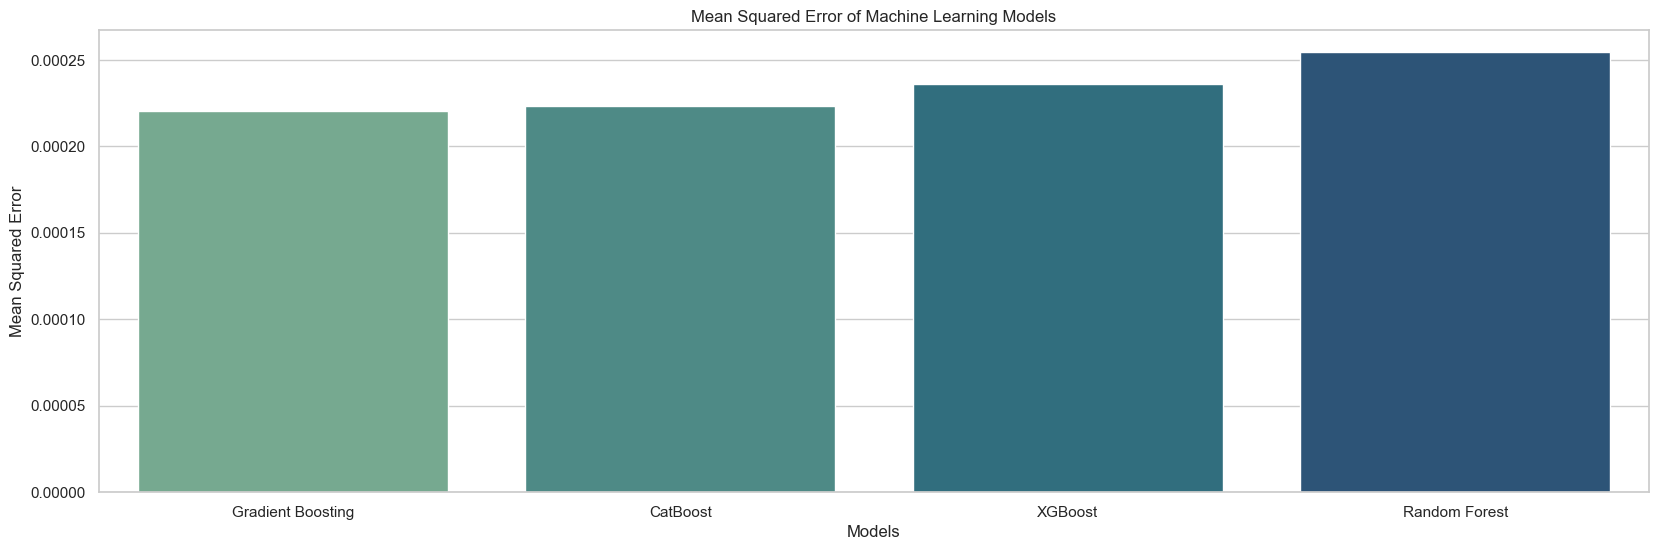

In [74]:
# Plotting Mean Squared Error of each model
mse_ser = new_results_df['MSE'].sort_values()
plt.figure(figsize = (20, 6))
sb.barplot(x= mse_ser.index, y = mse_ser, palette = 'crest', hue = mse_ser.index, legend = False)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Machine Learning Models');

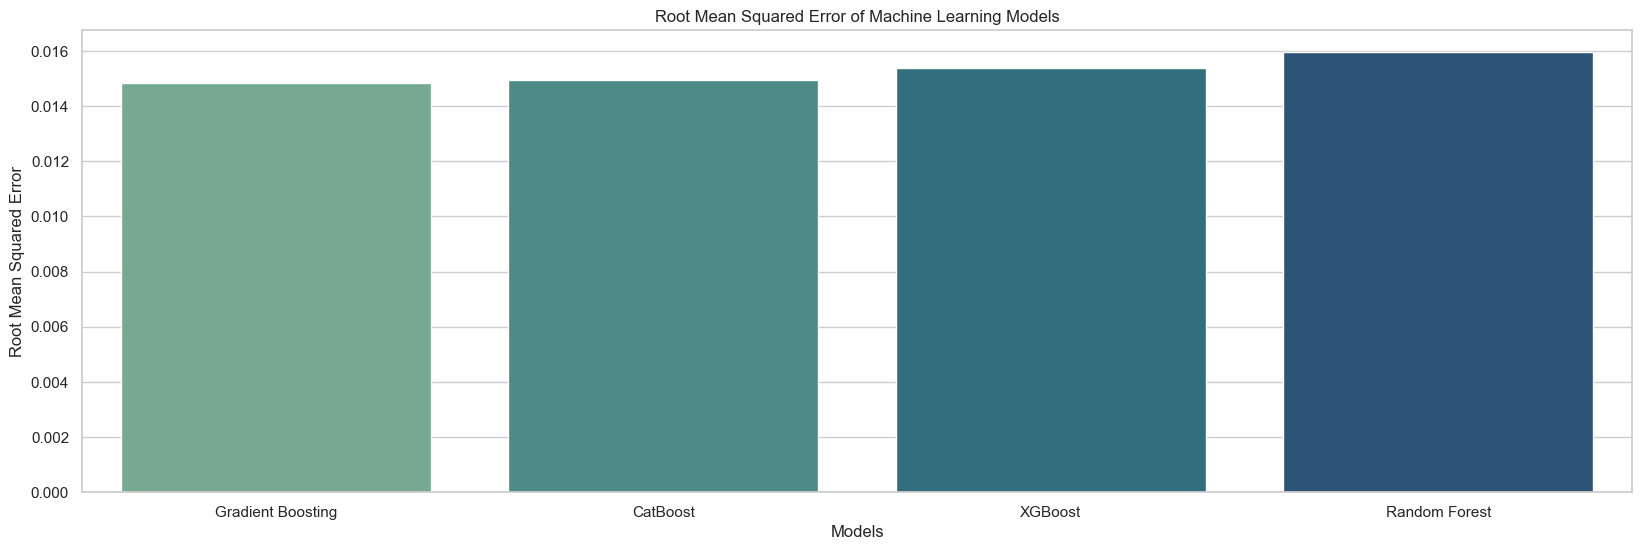

In [75]:
# Plotting Root Mean Squared Error of each model
rmse_ser = new_results_df['RMSE'].sort_values()
plt.figure(figsize = (20, 6))
sb.barplot(x= rmse_ser.index, y = rmse_ser, palette = 'crest', hue = rmse_ser.index, legend = False)
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error of Machine Learning Models');

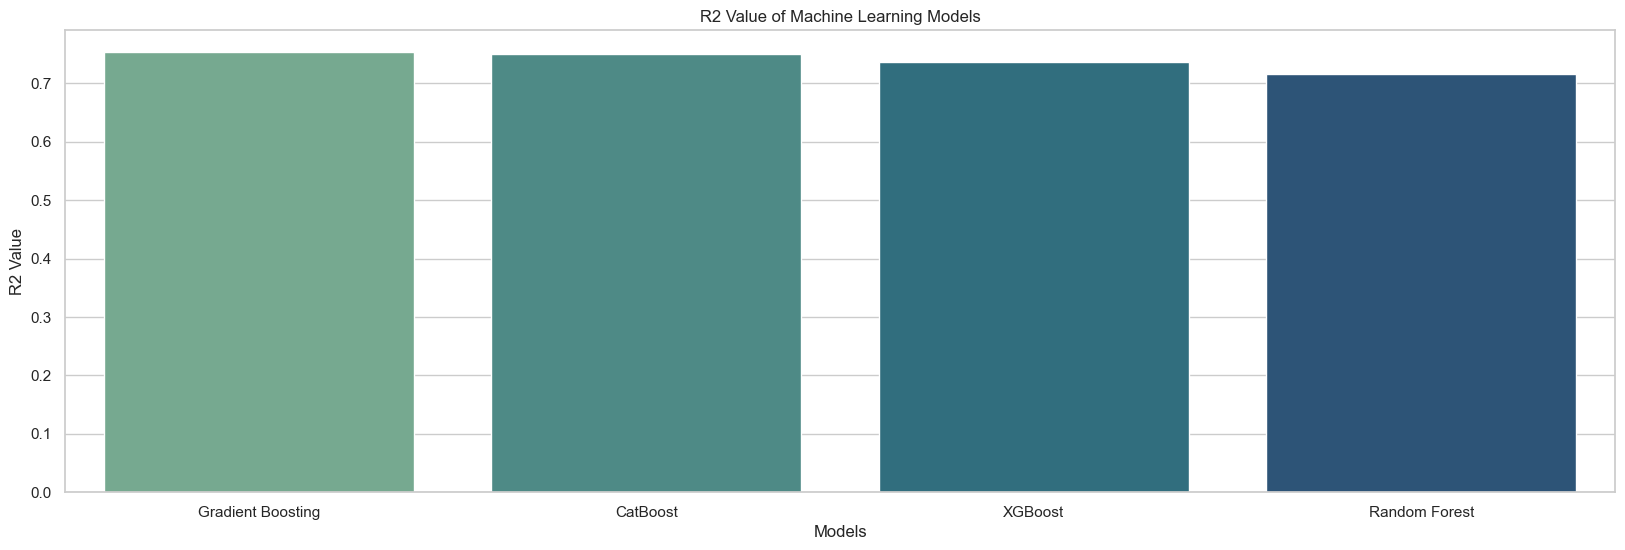

In [76]:
# Plotting R2 value of each model
r2_ser = new_results_df['R2'].sort_values(ascending = False)
plt.figure(figsize = (20, 6))
sb.barplot(x= r2_ser.index, y = r2_ser, palette = 'crest', hue = r2_ser.index, legend = False)
plt.xlabel('Models')
plt.ylabel('R2 Value')
plt.title('R2 Value of Machine Learning Models');

#### Part 4.4: Metrics Comparison

In [77]:
# Comparison of errors and R2 value
new_results_df = new_results_df.rename(columns = {"MAE": "Final MAE", "MSE": "Final MSE", "RMSE": "Final RMSE", "R2": "Final R2", "R2 Adjusted": "Final R2 Adjusted"})

# Combining the dataframe and rearranging the columns
comparison_df = pd.concat([results_df.loc[['Gradient Boosting', 'Random Forest', 'CatBoost', 'XGBoost']],new_results_df], axis = 1)
cols = comparison_df.columns.to_list()
cols = cols[0::5] + cols[1::5] + cols[2::5] + cols[3::5] + cols[4::5]
comparison_df = comparison_df[cols]
comparison_df

,MAE,Final MAE,MSE,Final MSE,RMSE,Final RMSE,R2,Final R2,R2 Adjusted,Final R2 Adjusted
Gradient Boosting,0.010360,0.010812,0.000202,0.000221,0.014221,0.014850,0.773685,0.753211,0.768787,0.750835
Random Forest,0.010492,0.011594,0.000207,0.000254,0.014387,0.015951,0.768341,0.715239,0.763327,0.712498
CatBoost,0.009927,0.010772,0.000189,0.000223,0.013763,0.014943,0.788011,0.750116,0.783423,0.747711
XGBoost,0.010553,0.011092,0.000212,0.000236,0.014556,0.015364,0.762884,0.735814,0.757751,0.733271


Using the five features chosen, which are `Bathroom`, `Size`, `City`, `Point of Contact`, and `Area Type`, in contrast to all the features, yielded models with higher errors and a lower R2 value. Furthermore, the R2-adjusted value decreases when using feature importance. Therefore, from the decreasing R2-adjusted value, the models with all the features are better models than the ones using feature importance as more of the variation in the dependent variable is explained by the model.

#### Part 4.5: Combination of Models

Given that the feature importance models are worse than the previous ones, the LightGBM will be considered in the combination of the models.

In [78]:
# Remaking the original data
data = original_data
data = pd.get_dummies(data, columns = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'], drop_first = True)
X = data.drop('Rent', axis = 1)
y = data['Rent']

# Using boxcox transformation to convert the data into a more normally distributed form
bc = boxcox(y)
y = bc[0]
lambda_ = bc[1]

# Splitting into train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the regressors
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
# Combining the predictions of the models before feature importance
combined_predictions = (
    0.20 * inv_boxcox(models['CatBoost'].predict(X_test), lambda_) +
    0.20 * inv_boxcox(models['Gradient Boosting'].predict(X_test), lambda_) +
    0.20 * inv_boxcox(models['LightGBM'].predict(X_test), lambda_) + 
    0.20 * inv_boxcox(models['Random Forest'].predict(X_test), lambda_) + 
    0.20 * inv_boxcox(models['XGBoost'].predict(X_test), lambda_)
)

In [80]:
# Calculating the evaluation metrics
mae = mean_absolute_error(inv_boxcox(y_test, lambda_), combined_predictions)
mse = mean_squared_error(inv_boxcox(y_test, lambda_), combined_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(inv_boxcox(y_test, lambda_), combined_predictions)

# Displaying evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-Squared Value:", r2)

Mean Absolute Error: 9422.940399240317
Mean Squared Error: 642176714.6595445
Root Mean Squared Error: 25341.205864353506
R-Squared Value: 0.7753866180191027


The combined predictions of the 5 models yielded an R-squared value of 77.54%. Even though it's less than the R-squared value of the CatBoost model, the CatBoost model was trained and tested with a Box-cox-transformed response variable, yielding a more accurate result than being trained and tested on the real values. Therefore, this combination of models yields an adequately good result in predicting `Rent` prices.